# **Exploratory Data Analysis (EDA)**

## Objectives
The objective is to predict the survival of coronary artery disease patients using the dataset
provided to help doctors to formulate preemptive medical treatments. In your submission, you
are to evaluate at least 3 suitable models for estimating the patients’ survivals.
 
## Dataset description
The dataset contains the medical records of coronary artery disease patients for a particular
hospital. Do note that there could be synthetic features in the dataset. Hence, please ensure
that you state and verify any assumptions that you make.

## Steps

1. Load data
2. Data exploration and cleaning
   * General cleaning
   * Analysis and re-formatting of data, identifying numerical vs categorical values
   * Separate features and label
   * Examine each feature's distribution for each label
3. Training
   * Split the data between train and test sets
   * Train and Evaluate a Binary Classification Model
4. Metrics Analysis
   * Accuracy
   * Recall
   * Precision
   * F1 Score
   * Analysis and selection of metric
   * Classification Report
   * Confusion Matrix
   * ROC Curve (Receiver Operator Characteristic)
   * AUC (Area Under Curve)
5. Pipeline creation
   * Create a model
   * Get prediction and plot performance
6. Pipeline creation with refactored code
   * Experimentation and analysis of features on predictive ability
   * Experimentation and analysis of different algorithms on predictive ability
7. Conclusion

***
## 1. Load data

In [1]:
#!/usr/bin/env python3

In [2]:
# Load SQL data

import os
import sqlite3

# Get relative path
dir = os.getcwd()
fullpath = os.path.join(dir, 'data', 'survive.db') # join subdirectorys with ',' instead of '/' as need to be OS-independant
print(fullpath)

# Connection object
o_conn = sqlite3.connect(fullpath)

# Cursor object (for executing SQL queries against database)
cur = o_conn.cursor()

# List table names
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

\\nas\Work\AIAP10\2022.03.28 Submission update\data\survive.db
[('survive',)]


In [3]:
# Load data into dataframe

import pandas as pd

s_tablename = 'survive' # change table name accordingly if not 'survive'
s_SQLquery = 'SELECT * FROM ' + s_tablename

df = pd.read_sql_query(s_SQLquery, o_conn)
df.head()

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,TIG1GE,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,185,105,12.3,180,93,green
1,VXUCV9,1,Male,No,Normal,75,Low,134,2.5,224000.0,99,162,13.0,140,47,black
2,AFH4F1,1,Female,No,Pre-diabetes,80,Low,135,1.3,192000.0,776,179,12.4,150,61,white
3,ZK6PAC,0,Male,No,Normal,-60,Low,136,0.9,228000.0,2261,136,15.3,130,48,yellow
4,6CVBRT,0,Female,No,Normal,70,Low,141,0.9,358000.0,1202,171,13.3,177,64,blue


***
# 2. Data exploration and cleaning

### 2a. General cleaning

In [4]:
# Check for empty fields
df.isnull().sum()

ID                          0
Survive                     0
Gender                      0
Smoke                       0
Diabetes                    0
Age                         0
Ejection Fraction           0
Sodium                      0
Creatinine                499
Platelets                   0
Creatine phosphokinase      0
Blood Pressure              0
Hemoglobin                  0
Height                      0
Weight                      0
Favorite color              0
dtype: int64

In [5]:
# Missing Creatinine records = 499
# Or 499/15000 = 3.3% of records, made subjective call to drop them entirely.
df = df.dropna(subset=['Creatinine'])

# Verify they've been dropped
df.isnull().sum()

ID                        0
Survive                   0
Gender                    0
Smoke                     0
Diabetes                  0
Age                       0
Ejection Fraction         0
Sodium                    0
Creatinine                0
Platelets                 0
Creatine phosphokinase    0
Blood Pressure            0
Hemoglobin                0
Height                    0
Weight                    0
Favorite color            0
dtype: int64

In [6]:
# Quick view of unique values for each column
for column in df:
    a = df[column].unique()
    print(column, ":", a)

ID : ['TIG1GE' 'VXUCV9' 'AFH4F1' ... '01ZP6F' 'JMSGEG' '16DJV7']
Survive : ['0' '1' 'No' 'Yes']
Gender : ['Male' 'Female']
Smoke : ['Yes' 'No' 'NO' 'YES']
Diabetes : ['Normal' 'Pre-diabetes' 'Diabetes']
Age : [ 50  75  80 -60  70  55  65  60 -40  53  68  42  45  79  58 -85  49  94
  43  77  51  61  72  69  40  78  62  63  87  54  57  95  90  48 -45  56
 -58  85 -50  86 -65  73  67 -52  82  59  46  44  64  52 -69 -42  41  47
 -53  81 -44 -49 -63  66 -59 -41 -70 -48 -55 -51 -73 -75 -57 -64 -78 -54
 -90 -80 -86 -61 -46 -62 -68 -43 -72 -66 -81 -47 -95 -82 -67]
Ejection Fraction : ['Low' 'Normal' 'High' 'L' 'N']
Sodium : [141 134 135 136 138 139 140 127 145 137 133 132 142 130 128 143 131 144
 116 121 129 125 124 126 148 113 146]
Creatinine : [0.7  2.5  1.3  0.9  1.1  1.7  0.75 1.2  0.8  1.18 1.8  1.   2.3  1.4
 1.83 3.5  3.8  1.9  2.2  9.   2.   2.7  1.6  9.4  5.8  1.5  2.9  2.1
 0.6  6.1  4.4  4.   2.4  0.5  3.4  5.   3.   6.8  3.7  3.2 ]
Platelets : [266000.   224000.   192000.   228000.

*Initial Observations*
* **ID Unique** - ID for each patient
* **Survive** - If the patient survives: 0 = No , 1 = Yes ***['0' '1' 'No' 'Yes']***
* **Gender** - Gender type ***['Male' 'Female']***
* **Smoke** - If the patient smokes ***['Yes' 'No' 'NO' 'YES']***
* **Diabetes** - Diabetes conditions of patient ***['Normal' 'Pre-diabetes' 'Diabetes']***
* **Age** - Age of the patient ***[integers, some negative]***
* **Ejection Fraction** - Strength of heart ***['Low' 'Normal' 'High' 'L' 'N']***
* **Sodium** - Level of sodium in the blood serum ( mg/dL) ***[integers]***
* **Creatinine** - Level of creatinine in the blood serum (mEq/L) ***[floats]***
* **Platelets** - Number of platelets in the blood serum (platelets/mL) ***[mostly integers in the thousands, some floats that look like errors]***
* **Creatine phosphokinase** - Level of the enzyme in the blood (mcg/L) ***[floats]***
* **Blood Pressure** - Level of blood pressure (mmHg) ***[integers]***
* **Hemoglobin** - Level of hemoglobin in the blood (g/dL) ***[floats]***
* **Height** - Height of patient (cm) ***[integers]***
* **Weight** - Weight of patient (kg) ***[integers]***
* **Favourite color** - Favourite color of patient ***['green' 'black' 'white' 'yellow' 'blue' 'red']***

In [7]:
# Check for duplicates in 'ID' to see if there are more than 1 each.
print(df['ID'].value_counts())

FHKHIH    4
OLUT4G    4
BESU8H    4
3Y29IZ    3
FVXX40    3
         ..
IAB17O    1
F5NX8A    1
WOM07V    1
1EBF9E    1
16DJV7    1
Name: ID, Length: 13614, dtype: int64


There are duplicates. Check how many there are.

In [8]:
# Create a dataframe recording counts of duplicates.
df_ID = df['ID'].value_counts().reset_index()
df_ID.columns = ['ID', 'count']

# Then count those with more than 1 instance.
print(len(df_ID[df_ID['count']>1]))

825


In [9]:
# There are 825 IDs with more than 1 entry. Need to investigate if they are duplicates or not. Check a sample entry.
print(df[df['ID'] == 'FHKHIH'])

          ID Survive  Gender Smoke      Diabetes  Age Ejection Fraction  \
1898  FHKHIH       0    Male   Yes        Normal   55               Low   
5903  FHKHIH       0    Male   Yes        Normal   53               Low   
6241  FHKHIH       0  Female    No  Pre-diabetes  -65               Low   
9299  FHKHIH       0  Female    No  Pre-diabetes   45            Normal   

      Sodium  Creatinine  Platelets  Creatine phosphokinase  Blood Pressure  \
1898     137        1.18  263358.03                     180             104   
5903     137        1.40  330000.00                     707             101   
6241     138        1.00  270000.00                     582              76   
9299     138        0.80  742000.00                    2060              53   

      Hemoglobin  Height  Weight Favorite color  
1898        11.9     176      59           blue  
5903        11.8     162      50         yellow  
6241        16.8     135      47           blue  
9299        17.1     162    

Looks like 4 different individuals, we can't drop based on duplicate ID.

In [10]:
# df = df.drop_duplicates(subset='ID', keep='first') # This keeps the first entry and drops the others based on ID alone. We can't do this as established above.

# Combine the column values
df['combined'] = ['_'.join(row.astype(str)) for row in df[df.columns[1:]].values]
print(df['combined'].value_counts())

0_Male_Yes_Normal_50_Low_141_0.7_266000.0_185_105_12.3_180_93_green           1
0_Female_No_Normal_61_Low_141_0.9_229000.0_84_160_9.6_137_54_white            1
0_Male_No_Pre-diabetes_80_Low_134_2.1_350000.0_582_75_13.6_182_75_white       1
0_Male_Yes_Pre-diabetes_65_Low_136_1.3_249000.0_582_65_15.6_143_38_yellow     1
0_Male_Yes_Normal_60_Normal_138_1.0_337000.0_95_44_11.2_134_46_white          1
                                                                             ..
0_Female_No_Pre-diabetes_45_Low_141_0.8_222000.0_615_77_14.2_138_27_yellow    1
1_Female_Yes_Diabetes_50_Low_136_1.2_153000.0_124_151_13.7_136_68_blue        1
1_Male_No_Normal_50_Low_137_1.9_210000.0_111_114_10.6_176_122_white           1
0_Female_No_Normal_64_Normal_135_1.5_309000.0_62_66_10.1_176_70_yellow        1
1_Male_No_Normal_45_Low_135_1.6_126000.0_582_143_16.8_147_48_red              1
Name: combined, Length: 14501, dtype: int64


In [11]:
# df = df.drop_duplicates(['combined']) # We don't need to drop any duplicates as there are none.

df.drop('combined', axis=1, inplace=True)

***
### 2b. Analysis and re-formatting of data, identifying numerical vs categorical values

In [12]:
print(df['Survive'].unique())
print(df['Survive'].value_counts())

['0' '1' 'No' 'Yes']
0      9082
1      4552
No      604
Yes     263
Name: Survive, dtype: int64


In [13]:
# Transform strings to 0 and 1
df = df.replace({'Survive' : { '0' : 0, '1' : 1, 'No' : 0, 'Yes' : 1}})
print(df['Survive'].unique())
print(df['Survive'].value_counts())

[0 1]
0    9686
1    4815
Name: Survive, dtype: int64


'Survive' will be the label in the classification model.

In [14]:
print(df['Gender'].unique())
print(df['Gender'].value_counts())

['Male' 'Female']
Male      9427
Female    5074
Name: Gender, dtype: int64


In [15]:
# Transform strings to 0 and 1
df = df.replace({'Gender' : { 'Male' : 1, 'Female' : 0}})
print(df['Gender'].unique())
print(df['Gender'].value_counts())

[1 0]
1    9427
0    5074
Name: Gender, dtype: int64


'Gender' being a categorical feature, will be One Hot Encoded later in the classification pipeline.

In [16]:
print(df['Smoke'].unique())
print(df['Smoke'].value_counts())

['Yes' 'No' 'NO' 'YES']
No     9386
Yes    4545
NO      392
YES     178
Name: Smoke, dtype: int64


In [17]:
# Transform strings to 0 and 1
df = df.replace({'Smoke' : { 'Yes' : 1, 'No' : 0, 'NO' : 0, 'YES' : 1}})
print(df['Smoke'].unique())
print(df['Smoke'].value_counts())

[1 0]
0    9778
1    4723
Name: Smoke, dtype: int64


'Smoke' being a categorical feature, will be One Hot Encoded later in the classification pipeline.

In [18]:
print(df['Diabetes'].unique())
print(df['Diabetes'].value_counts())

['Normal' 'Pre-diabetes' 'Diabetes']
Normal          8499
Pre-diabetes    3025
Diabetes        2977
Name: Diabetes, dtype: int64


In [19]:
df = df.replace({'Diabetes' : { 'Normal' : 0, 'Pre-diabetes' : 1, 'Diabetes' : 2}})
print(df['Diabetes'].unique())
print(df['Diabetes'].value_counts())

[0 1 2]
0    8499
1    3025
2    2977
Name: Diabetes, dtype: int64


'Diabetes' being a categorical feature, will be One Hot Encoded later in the classification pipeline.

In [20]:
print(df['Age'].unique())
print(df['Age'].value_counts())

[ 50  75  80 -60  70  55  65  60 -40  53  68  42  45  79  58 -85  49  94
  43  77  51  61  72  69  40  78  62  63  87  54  57  95  90  48 -45  56
 -58  85 -50  86 -65  73  67 -52  82  59  46  44  64  52 -69 -42  41  47
 -53  81 -44 -49 -63  66 -59 -41 -70 -48 -55 -51 -73 -75 -57 -64 -78 -54
 -90 -80 -86 -61 -46 -62 -68 -43 -72 -66 -81 -47 -95 -82 -67]
 60    1636
 50    1293
 65    1241
 70    1197
 45     887
       ... 
-81       2
-95       1
-41       1
-47       1
-67       1
Name: Age, Length: 87, dtype: int64


In [21]:
df['Age'] = df['Age'].abs() # assume that recorded negative values are meant to positive
print(df['Age'].unique())
print(df['Age'].value_counts())

[50 75 80 60 70 55 65 40 53 68 42 45 79 58 85 49 94 43 77 51 61 72 69 78
 62 63 87 54 57 95 90 48 56 86 73 67 52 82 59 46 44 64 41 47 81 66]
60    1699
50    1334
65    1271
70    1230
45     911
55     809
58     555
75     545
53     484
63     356
80     344
42     340
40     336
72     335
85     296
68     232
52     227
62     226
73     205
59     193
61     193
49     172
51     169
69     168
90     162
64     157
46     149
82     129
77     106
48      99
78      99
57      97
44      92
66      92
95      84
67      81
54      79
86      64
94      54
47      50
79      49
56      48
87      48
81      47
41      45
43      40
Name: Age, dtype: int64


Plot distribution to have a view.

In [22]:
import plotter

Minimum: 40.00
Mean(cyan): 60.96
Median(red): 60.00
Mode(yellow): 60.00
Maximum: 95.00
StdDev: 11.89


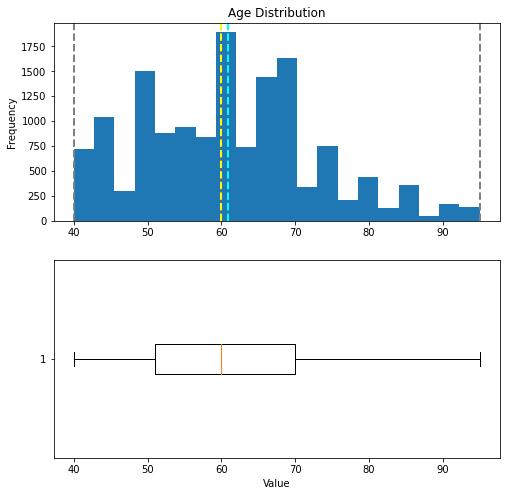

In [23]:
# Plot 'Age' distribution
# plotter.histo_boxplot(df, 'Age', 20)
distri_age = plotter.Distribution(df, 'Age', 20)
distri_age.histo_boxplot()

'Age' being a numeric feature, will be scaled later.

In [24]:
print(df['Ejection Fraction'].unique())
print(df['Ejection Fraction'].value_counts())

['Low' 'Normal' 'High' 'L' 'N']
Low       12314
Normal     1598
L           467
N            64
High         58
Name: Ejection Fraction, dtype: int64


In [25]:
df = df.replace({'Ejection Fraction' : { 'Low' : 0, 'Normal' : 1, 'High' : 2, 'L' : 0, 'N' : 1}})
print(df['Ejection Fraction'].unique())
print(df['Ejection Fraction'].value_counts())

[0 1 2]
0    12781
1     1662
2       58
Name: Ejection Fraction, dtype: int64


'Ejection Fraction' being a categorical feature, will be One Hot Encoded later in the classification pipeline.

In [26]:
print(df['Sodium'].unique())
print(df['Sodium'].value_counts())

[141 134 135 136 138 139 140 127 145 137 133 132 142 130 128 143 131 144
 116 121 129 125 124 126 148 113 146]
136    1900
137    1846
140    1636
134    1633
138    1103
139    1092
135     762
132     698
141     582
142     532
133     482
130     444
145     433
131     255
144     246
127     178
143     138
129      96
128      87
125      57
121      55
116      53
146      46
148      40
113      38
124      36
126      33
Name: Sodium, dtype: int64


Minimum: 113.00
Mean(cyan): 136.58
Median(red): 137.00
Mode(yellow): 136.00
Maximum: 148.00
StdDev: 4.38


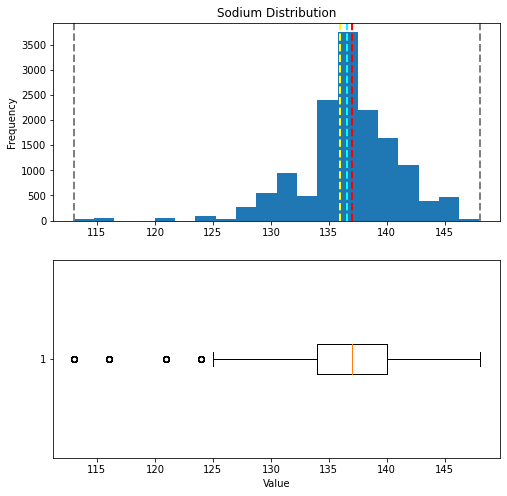

In [27]:
# Plot 'Sodium' distribution
# plotter.histo_boxplot(df, 'Sodium', 20)
distri_sodium = plotter.Distribution(df, 'Sodium', 20)
distri_sodium.histo_boxplot()

Exhbits central tendency. 'Sodium' being a numeric feature, will be scaled later.

In [28]:
print(df['Creatinine'].unique())
print(df['Creatinine'].value_counts())

[0.7  2.5  1.3  0.9  1.1  1.7  0.75 1.2  0.8  1.18 1.8  1.   2.3  1.4
 1.83 3.5  3.8  1.9  2.2  9.   2.   2.7  1.6  9.4  5.8  1.5  2.9  2.1
 0.6  6.1  4.4  4.   2.4  0.5  3.4  5.   3.   6.8  3.7  3.2 ]
1.00    2425
1.10    1559
0.90    1524
1.20    1140
0.80    1110
1.30    1004
0.70     925
1.18     524
1.70     464
1.40     436
1.83     399
1.90     285
1.60     257
2.10     241
1.50     227
0.60     182
2.50     179
1.80     172
2.30     161
2.70     145
2.40     108
3.50     103
3.00      93
5.80      67
2.20      65
2.90      63
3.20      54
3.40      52
3.70      52
9.40      50
6.10      49
4.00      49
5.00      49
9.00      47
4.40      47
6.80      46
0.50      43
0.75      37
3.80      34
2.00      34
Name: Creatinine, dtype: int64


Minimum: 0.50
Mean(cyan): 1.41
Median(red): 1.10
Mode(yellow): 1.00
Maximum: 9.40
StdDev: 1.04


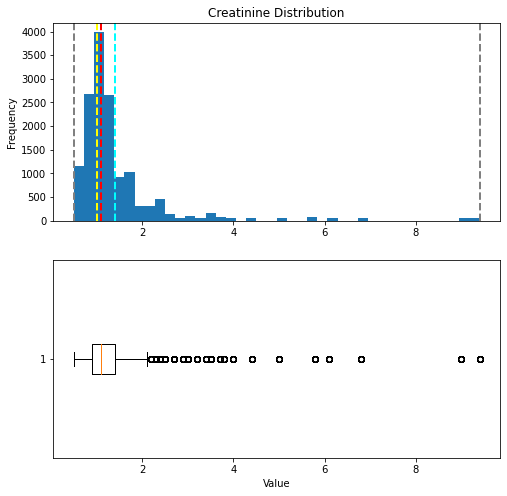

In [29]:
# Plot 'Creatinine' distribution
# plotter.histo_boxplot(df, 'Creatinine', 40)
distri_creatinine = plotter.Distribution(df, 'Creatinine', 40)
distri_creatinine.histo_boxplot()

Positive skew distribution. 'Creatinine' being a numeric feature, will be scaled later.

In [30]:
print(df['Platelets'].unique())
print(df['Platelets'].value_counts())

[266000.   224000.   192000.   228000.   358000.   314000.   294000.
  62000.   194000.   127000.   185000.   255000.   368000.   533000.
 289000.   237000.   263358.03 189000.   172000.   164000.   243000.
 305000.   140000.   132000.   173000.   319000.   304000.   543000.
 317000.   176000.   406000.   327000.   226000.   302000.   271000.
 279000.   267000.   184000.   196000.   232000.   282000.   211000.
 274000.   290000.   298000.   215000.   203000.   241000.   742000.
 351000.   310000.   286000.   204000.   216000.   174000.   147000.
 105000.   481000.   221000.   283000.   262000.   218000.   151000.
 166000.   219000.   150000.   395000.   461000.   371000.   254000.
 390000.    87000.    25100.   264000.   126000.   155000.   133000.
 277000.   388000.   300000.   153000.   252000.    73000.   303000.
 306000.   244000.   210000.   119000.   188000.   350000.    51000.
 297000.   284000.   122000.   365000.   418000.   160000.   229000.
 250000.   276000.   223000.   325

Minimum: 25100.00
Mean(cyan): 263028.95
Median(red): 262000.00
Mode(yellow): 263358.03
Maximum: 850000.00
StdDev: 98013.95


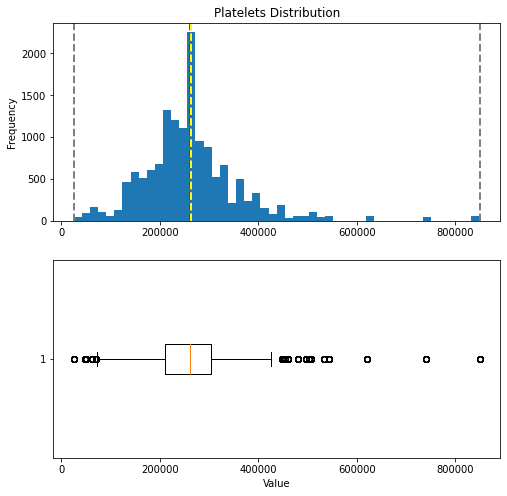

In [31]:
# Plot 'Platelets' distribution
# plotter.histo_boxplot(df, 'Platelets', 50)
distri_platelets = plotter.Distribution(df, 'Platelets', 50)
distri_platelets.histo_boxplot()

Normal-looking distribution. However, there's an strange 263358.03 value. Check how many records might have it.

In [32]:
# Check for duplicates in 'Platelets' to see if there are more than 1 each.
df['Platelets'].value_counts()

263358.03    1211
255000.00     214
235000.00     214
279000.00     201
226000.00     201
             ... 
336000.00      34
461000.00      34
427000.00      34
328000.00      33
264000.00      32
Name: Platelets, Length: 176, dtype: int64

Entries with the same 263358.03 are unusually high. This appears to be an errorneous entry.

In [33]:
num_StrangePlatelets = len(df[df['Platelets']==263358.03]) # number of records with Platelets as 263358.03
num_Records = len(df) # total remaining valid records
pc_StrangePlatelets = num_StrangePlatelets / num_Records
print(pc_StrangePlatelets)

0.08351148196676092


8.35% of records have the same strange platelet count of 236658.03. That's quite large.

Have to decide whether to drop them or round to the nearest thousand to match the format of the rest. Or change to mean value.

It's a very specific error though. If Platelet count is a major factor in prediction, this error will greatly affect the result.

Have an overview of the records with this value.

In [34]:
print(df[df['Platelets'] == 263358.03])

           ID  Survive  Gender  Smoke  Diabetes  Age  Ejection Fraction  \
19     ML4FSN        0       0      0         0   45                  2   
31     5GGQ08        1       1      0         1   94                  0   
40     SF9GR5        0       0      0         0   42                  1   
45     CA7XDO        0       0      0         0   45                  2   
47     OX0W7W        0       1      1         2   50                  0   
...       ...      ...     ...    ...       ...  ...                ...   
14912  CWOC4D        0       1      1         0   55                  0   
14937  GSLU48        1       0      0         0   86                  0   
14939  YTH4T5        0       1      1         2   51                  0   
14946  F7EL8W        0       1      0         0   53                  1   
14975  TT9J1W        0       1      1         1   51                  0   

       Sodium  Creatinine  Platelets  Creatine phosphokinase  Blood Pressure  \
19        137      

Each row looks different enough for the same strange Platelet count to be equal. Even though it's 8.35% of the data set, decided to drop these rows as it seems the entry is from human error and the potential effect on prediction is costly.

In [35]:
rows1 = len(df.index)
print('rows before deletion:',rows1)

# drop rows where 'Platelets' == 263358.03
df = df[df.Platelets != 263358.03] # this is a very specific condition, could consider deleting values not rounded to thousands *000s

rows2 = len(df.index)
print('rows after deletion:',rows2)

print('rows deleted:',rows1 - rows2)

rows before deletion: 14501
rows after deletion: 13290
rows deleted: 1211


Minimum: 25100.00
Mean(cyan): 262998.97
Median(red): 253000.00
Mode(yellow): 235000.00
Maximum: 850000.00
StdDev: 102382.45


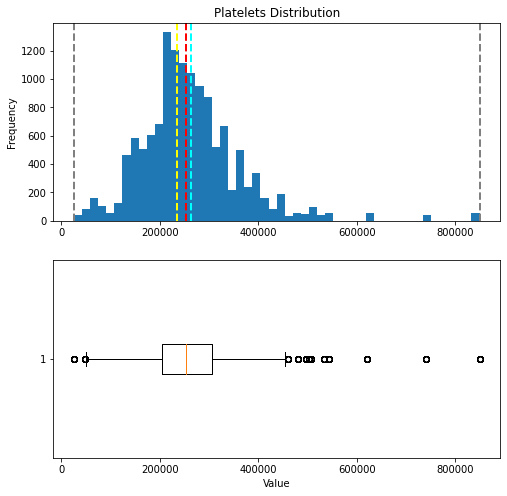

In [36]:
# Re-plot 'Platelets' distribution
# plotter.histo_boxplot(df, 'Platelets', 50)
distri_platelets = plotter.Distribution(df, 'Platelets', 50)
distri_platelets.histo_boxplot()

Doesn't seem to adversely affect the distribution.
'Platelets' being a numeric feature, will be scaled later.

In [37]:
print(df['Creatine phosphokinase'].unique())
print(df['Creatine phosphokinase'].value_counts())

[ 185   99  776 2261 1202 2017  326   96  166  118  246  571  129   63
   81  220  102   64   55  400 5882 2656  582 2413   69   47  789   68
   92  358  171  109  618 1876  159 1380  835  248  115   76 1051   80
 1548  231  211  135  305   66 2695 2060   90  143   53  318  130 1419
  224  281   61 2281  149  127  260  427  577  145  257  371  337  160
  133  123  200   93   60  369 1767  478   54  131  737   94  250  514
  128  122 1896  607   91   84 1082   52   75 3966  553  111  855  168
  280  104  203  244  146  207  291  110  148  655  675  196  124  232
  897   62  898 1185   58  754  167  720  190 2522   97   59   86  249
   57 7702   56  624   78  119  646 1820  320 2442  972  981 4540  132
  292  113  101  212  103  482  336  615  270   70  198  144 2334   88
  156  315  308  364  298  235  170  418  233 1610  112  154 1021  258
  193  588  245  748   72  176 1808  335  328  910   23 5209  161  151
  157  572  936  191  379   95  253  121  213  707  125   30  395 2794
  943]

Minimum: 23.00
Mean(cyan): 530.56
Median(red): 231.00
Mode(yellow): 582.00
Maximum: 7702.00
StdDev: 870.47


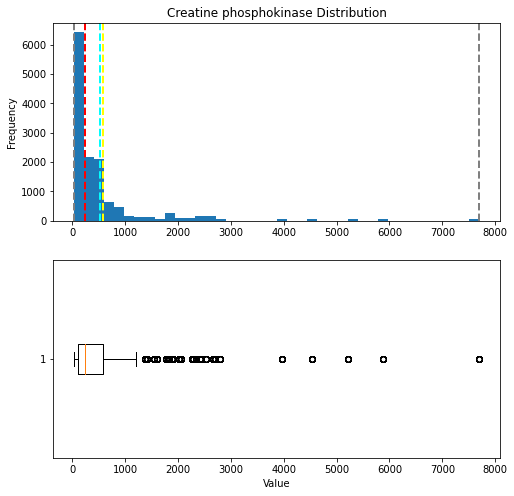

In [38]:
# Plot 'Creatine phosphokinase' distribution
# plotter.histo_boxplot(df, 'Creatine phosphokinase', 40)
distri_cphospho = plotter.Distribution(df, 'Creatine phosphokinase', 40)
distri_cphospho.histo_boxplot()

Heavily positively skewed. 'Creatine phosphokinase' being a numeric feature, will be scaled later.

In [39]:
print(df['Blood Pressure'].unique())
print(df['Blood Pressure'].value_counts())

[105 162 179 136 171  88 164  82  83  59 102  71 139 165  56 145 124  75
 109 147 110  79  76 133 108  85 170 177  73 131  58 130  90  48 176 123
 174 132 115  92 153  67  47  41 100  89 118 152 112 111  86 141  80  53
  69  64  57 138  84  45  74  72 159 117  95 151  77 173  55 129 116  96
  44 150  93 144 113  78 149  54 125 167 154 114  81  87 119 169  94 156
 163 134 122 168 175  46 107 143  52 172 166 158 148 106  63 155 104 157
 160  62  68  99 103  65  43  66  91 178  40  51 135  98 128  70  49  97
  60 121 101 140 126  61 142  50 161  42 146 137 127]
91     135
72     132
41     128
87     127
78     125
      ... 
171     63
128     61
163     61
127     61
179     57
Name: Blood Pressure, Length: 139, dtype: int64


Minimum: 40.00
Mean(cyan): 103.88
Median(red): 100.50
Mode(yellow): 91.00
Maximum: 179.00
StdDev: 39.78


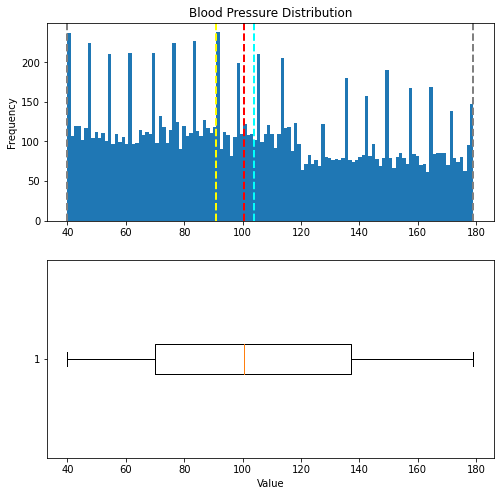

In [40]:
# Plot 'Blood Pressure' distribution
# plotter.histo_boxplot(df, 'Blood Pressure', 120)
distri_bp = plotter.Distribution(df, 'Blood Pressure', 120)
distri_bp.histo_boxplot()

Does not exhibit central tendency. Certain values separated by a somewhat constant distance appear at twice the frequency as the rest of the values.

It might be possible that this is aggregated data from multiple sources and one source is rounding values according to the discrete jumps.

'Blood Pressure' being a numeric feature, will be scaled later.

In [41]:
print(df['Hemoglobin'].unique())
print(df['Hemoglobin'].value_counts())

[12.3 13.  12.4 15.3 13.3 16.5 16.3 14.1 15.5 12.7 10.7 16.6  9.1 14.4
 16.  10.5 13.2 11.  10.  15.2 12.8  9.4 11.6 12.9 10.1 13.7 13.5 10.9
 11.7  9.9 10.2 16.4 10.6 13.6 14.2 13.1 11.2 11.5 17.5 11.4 12.2 17.1
 10.4 16.1 15.7 12.5 15.  11.1  9.8  9.5 11.3  9.3 14.5 17.3 16.2 12.6
 14.3  9.2 14.7 13.9 10.8 17.   9.6 15.6 15.9 10.3 13.8 11.8 14.8 16.8
 15.4 16.9 17.4 14.9 14.  13.4  9.  14.6 12.1 15.1  9.7 12.  15.8 17.2
 16.7 11.9]
11.0    235
10.4    235
10.6    229
9.9     229
10.9    226
       ... 
13.4    110
16.7    102
9.0     100
17.5     55
12.0     52
Name: Hemoglobin, Length: 86, dtype: int64


Minimum: 9.00
Mean(cyan): 12.79
Median(red): 12.50
Mode(yellow): 10.40
Maximum: 17.50
StdDev: 2.51


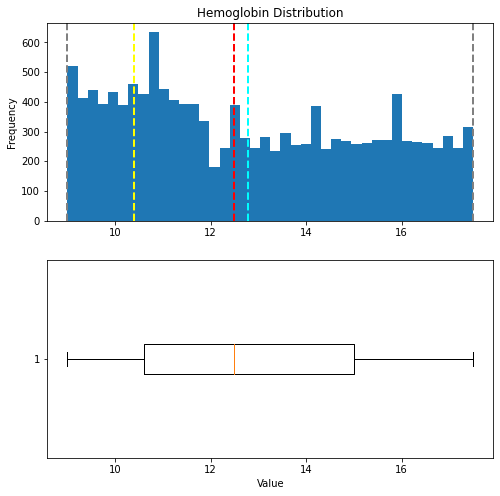

In [42]:
# Plot 'Hemoglobin' distribution
# plotter.histo_boxplot(df, 'Hemoglobin', 40)
distri_haemo = plotter.Distribution(df, 'Hemoglobin', 40)
distri_haemo.histo_boxplot()

Does not exhibit central tendency. 'Hemoglobin' being a numeric feature, will be scaled later.

In [43]:
print(df['Height'].unique())
print(df['Height'].value_counts())

[180 140 150 130 177 176 172 167 156 174 132 141 157 135 155 145 160 186
 178 134 182 148 168 142 183 143 181 144 163 166 146 131 185 179 165 188
 175 137 170 153 139 147 133 161 171 173 189 164 184 169 187 154 136 151
 149 138 152 158 162 159]
157    265
137    254
138    252
140    251
188    248
170    244
165    241
177    238
142    237
186    237
174    236
183    235
133    235
173    234
152    231
160    231
130    231
148    230
131    229
176    229
136    228
164    227
181    225
159    225
167    225
178    225
168    224
158    223
154    222
161    221
187    220
179    220
145    219
163    219
134    218
172    218
184    216
146    216
166    216
144    216
135    216
150    212
147    211
153    208
141    208
185    206
171    206
143    206
132    206
180    205
155    205
139    204
182    204
149    200
169    200
189    199
156    198
175    198
162    195
151    192
Name: Height, dtype: int64


Minimum: 130.00
Mean(cyan): 159.43
Median(red): 159.00
Mode(yellow): 157.00
Maximum: 189.00
StdDev: 17.38


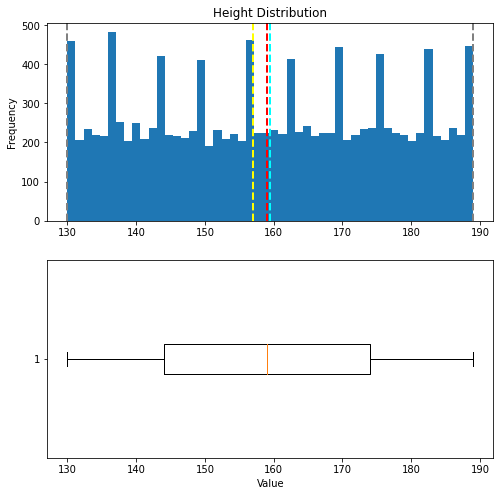

In [44]:
# Plot 'Height' distribution
# plotter.histo_boxplot(df, 'Height', 50)
distri_height = plotter.Distribution(df, 'Height', 50)
distri_height.histo_boxplot()

Quite evenly spread out but again we see certain values separated by a somewhat constant distance appearing at twice the frequency as the rest of the values.
It does seem likely this is aggregated data from multiple sources and one source is rounding values according to the discrete jumps. It remains to be seen whether 'Height' is a good predictor of survivability, but if the later tests show it is, this should be investigated further. Possibly by separating this data apart and retesting.
Would have expected a normal-looking distribution for this feature though.
'Height' being a numeric feature, will be scaled later.

In [45]:
print(df['Weight'].unique())
print(df['Weight'].value_counts())

[ 93  47  61  48  64  58  70  50  94  45 118  36  73  37 117  46  69 106
  68 100  84 128  97  22  53  42  55  65  85  39  51  67 102  77  62 103
  66 113  90  27  30  78  83 107  60 112 114  91  49  80  95  43  52 125
  99 101 104  81  87  26  71  92  54 124  23  44 115  38 110  40  79  75
  74 109  76  96  41  57  56  63 133  98 108  59  88  86  32  72 119  33
  31 116  35 131  89  82  19  34  28 130 105 123 136 111 134 120  24 132
  29 126 135 129 139 140 121 127  25  20 138 122  21 137 141]
64     238
52     233
66     222
59     216
55     214
      ... 
138      6
140      3
19       2
20       1
141      1
Name: Weight, Length: 123, dtype: int64


Minimum: 19.00
Mean(cyan): 69.46
Median(red): 66.00
Mode(yellow): 64.00
Maximum: 141.00
StdDev: 25.29


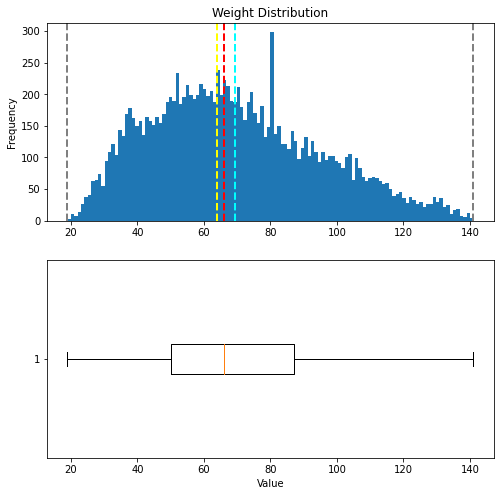

In [46]:
# Plot 'Weight' distribution
# plotter.histo_boxplot(df, 'Weight', 120)
distri_weight = plotter.Distribution(df, 'Weight', 120)
distri_weight.histo_boxplot()

Exhibits central tendency. 'Weight' being a numeric feature, will be scaled later.

In [47]:
print(df['Favorite color'].unique())
print(df['Favorite color'].value_counts())

['green' 'black' 'white' 'yellow' 'blue' 'red']
blue      2258
yellow    2237
green     2218
white     2204
black     2187
red       2186
Name: Favorite color, dtype: int64


In [48]:
df = df.replace({'Favorite color' : { 'green' : 0, 'black' : 1, 'white' : 2, 'yellow' : 3, 'blue' : 4, 'red' : 5}})
print(df['Favorite color'].unique())
print(df['Favorite color'].value_counts())

[0 1 2 3 4 5]
4    2258
3    2237
0    2218
2    2204
1    2187
5    2186
Name: Favorite color, dtype: int64


'Favorite color' being a categorical feature, will be One Hot Encoded later in the classification pipeline.

In [49]:
# Overview of changes
for column in df:
    a = df[column].unique()
    print(column, ":", a)

ID : ['TIG1GE' 'VXUCV9' 'AFH4F1' ... '01ZP6F' 'JMSGEG' '16DJV7']
Survive : [0 1]
Gender : [1 0]
Smoke : [1 0]
Diabetes : [0 1 2]
Age : [50 75 80 60 70 55 65 40 53 68 42 79 58 85 45 49 43 77 51 61 72 69 78 62
 63 87 54 57 95 90 48 56 73 52 82 59 46 44 64 41 47 81 66 67]
Ejection Fraction : [0 1]
Sodium : [141 134 135 136 138 139 140 127 145 137 133 132 142 130 128 143 131 144
 116 121 129 125 124 126 148]
Creatinine : [0.7  2.5  1.3  0.9  1.1  1.7  0.75 1.2  0.8  1.8  1.   2.3  1.4  3.5
 3.8  1.9  2.2  9.   2.   2.7  1.6  9.4  5.8  1.5  2.9  2.1  0.6  1.18
 6.1  4.4  4.   1.83 2.4  0.5  3.4  5.   3.   3.7  3.2 ]
Platelets : [266000. 224000. 192000. 228000. 358000. 314000. 294000.  62000. 194000.
 127000. 185000. 255000. 368000. 533000. 289000. 237000. 189000. 172000.
 164000. 243000. 305000. 140000. 132000. 173000. 319000. 304000. 543000.
 317000. 176000. 406000. 327000. 226000. 302000. 271000. 279000. 267000.
 184000. 196000. 232000. 282000. 211000. 274000. 290000. 298000. 215000.
 203

We analyse the size of each label.

We will look to predict the label **'Survive'** = **0** for patients who did not survived coronary artery disease, and **1** for patients who did.

In [50]:
# Firstly we want to see that size of each label is significant, otherwise the Accuracy metric might not be meaningful.
num_survivors = len(df[df['Survive'] == 1])
num_nonsurvivors = len(df[df['Survive'] == 0])

print('Number of survivors:', num_survivors)
print('Number of non-survivors:', num_nonsurvivors)
rows = len(df)
print('Percentage of survivors: {:.1f}'.format(num_survivors/rows*100),"%")
print('Percentage of non-survivors: {:.1f}'.format(num_nonsurvivors/rows*100),"%")

Number of survivors: 4306
Number of non-survivors: 8984
Percentage of survivors: 32.4 %
Percentage of non-survivors: 67.6 %


Size of each label is significant but not symmetrical.

In [51]:
# overview of reformatted data
df.head()

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,TIG1GE,0,1,1,0,50,0,141,0.7,266000.0,185,105,12.3,180,93,0
1,VXUCV9,1,1,0,0,75,0,134,2.5,224000.0,99,162,13.0,140,47,1
2,AFH4F1,1,0,0,1,80,0,135,1.3,192000.0,776,179,12.4,150,61,2
3,ZK6PAC,0,1,0,0,60,0,136,0.9,228000.0,2261,136,15.3,130,48,3
4,6CVBRT,0,0,0,0,70,0,141,0.9,358000.0,1202,171,13.3,177,64,4


***
### 2c. Separate features and label

In [52]:
# copy-paste to features below
print(list(df))

['ID', 'Survive', 'Gender', 'Smoke', 'Diabetes', 'Age', 'Ejection Fraction', 'Sodium', 'Creatinine', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight', 'Favorite color']


In [53]:
# Separate features and labels
features = ['Gender', 'Smoke', 'Diabetes', 'Age', 'Ejection Fraction', 'Sodium', 'Creatinine', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight', 'Favorite color']
label = 'Survive'
X, y = df[features].values, df[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [1.0, 1.0, 0.0, 50.0, 0.0, 141.0, 0.7, 266000.0, 185.0, 105.0, 12.3, 180.0, 93.0, 0.0] 
  Label: 0
Patient 2 
  Features: [1.0, 0.0, 0.0, 75.0, 0.0, 134.0, 2.5, 224000.0, 99.0, 162.0, 13.0, 140.0, 47.0, 1.0] 
  Label: 1
Patient 3 
  Features: [0.0, 0.0, 1.0, 80.0, 0.0, 135.0, 1.3, 192000.0, 776.0, 179.0, 12.4, 150.0, 61.0, 2.0] 
  Label: 1
Patient 4 
  Features: [1.0, 0.0, 0.0, 60.0, 0.0, 136.0, 0.9, 228000.0, 2261.0, 136.0, 15.3, 130.0, 48.0, 3.0] 
  Label: 0


***
### 2d. Examine each feature's distribution for each label

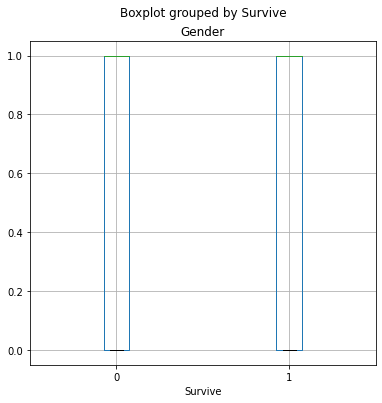

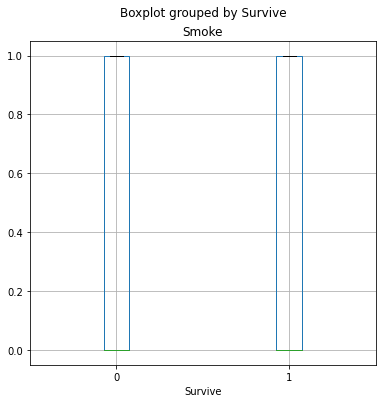

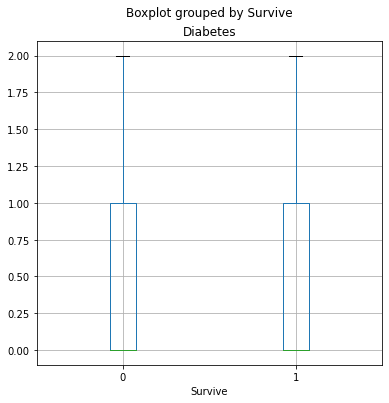

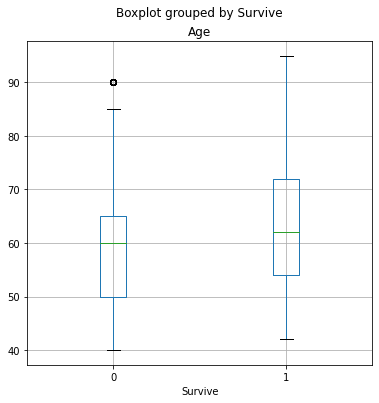

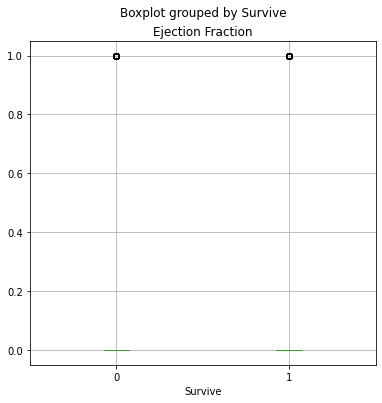

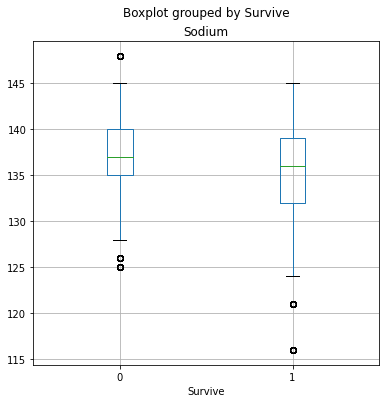

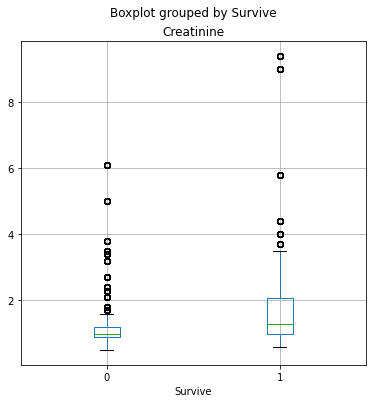

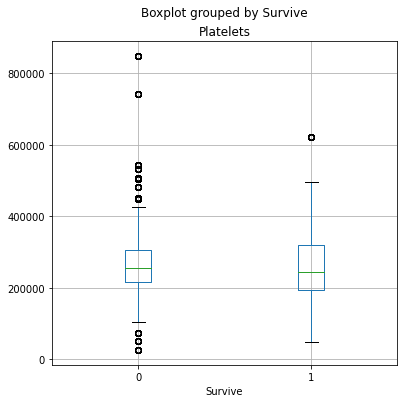

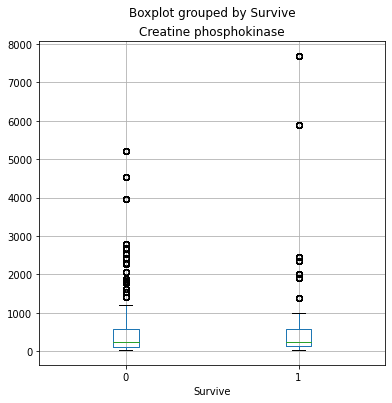

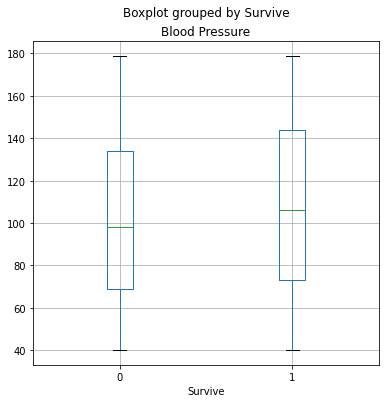

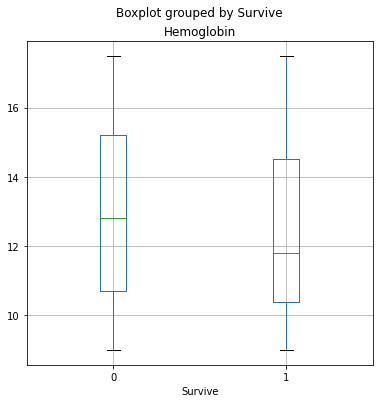

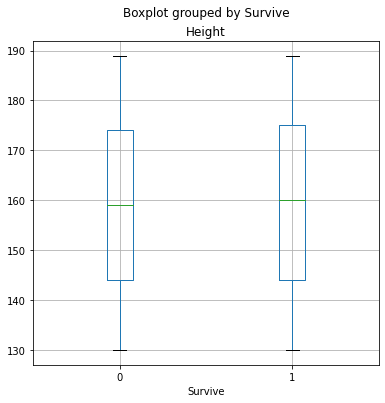

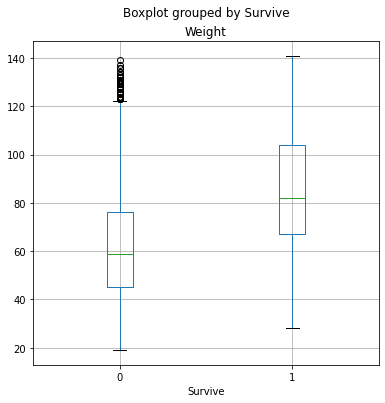

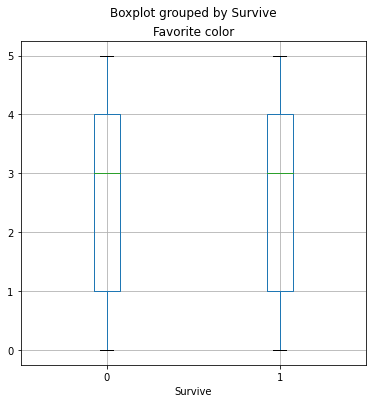

In [54]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Gender', 'Smoke', 'Diabetes', 'Age', 'Ejection Fraction', 'Sodium', 'Creatinine', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight', 'Favorite color']
for col in features:
    df.boxplot(column=col, by='Survive', figsize=(6,6))
    plt.title(col)
plt.show()

**Weight** shows markedly different distributions for non-survivors and survivors.

**Hemoglobin**, **Blood Pressure**, **Creatinine**, **Sodium**, **Age** distributions also show some difference.

***

# 3. Training

### 3a. Split the data between train and test sets

We now need to train a classifier so that it finds a relationship between the features and the label values.

In order to test the effectiveness of our training, we need to reserve a portion of the data for testing, so that we can compare the predicted labels with the already known labels of the test set.

We use the **train_test_split** function from **scikit-learn** package to get a statistically random split of training and test data. We will reserve 30% for testing.

In [55]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
split_testsize = 0.30
split_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_testsize, random_state=split_seed)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 9303
Test cases: 3987


***
### 3b. Train and Evaluate a Binary Classification Model
We now train our model by fitting the *training features* (**X_train**) to the *training labels* (**y_train**). We'll start with using the *Logistic Regression*, an algorithm for classification.

We also set a *regularization* parameter, which is used to counteract any bias in the sample, and help the model generalize by avoiding *overfitting* the model to the training data.

In [56]:
# Train with Logistic Regression
from sklearn.linear_model import LogisticRegression

# Set regularization rate
LogReg_RegularizationRate = 0.1

model = LogisticRegression(C=1/LogReg_RegularizationRate, solver="liblinear").fit(X_train, y_train)
print(model)

LogisticRegression(C=10.0, solver='liblinear')


The model is now trained using the training data.

We now use the test data earlier held back to evaluate how well it predicts.

In [57]:
# Use the model to predict labels for the test set, and compare the predicted labels to the known labels.
predictions = model.predict(X_test)
print('Predicted labels:', predictions)
print('Actual labels:   ', y_test)

Predicted labels: [0 0 0 ... 1 0 0]
Actual labels:    [0 0 0 ... 0 0 0]


***
# 4. Metrics Analysis

There's too much to ingest visually so we'll examine some metrics with the below:
* Accuracy
* Recall
* Precision
* F1 Score
* Classification Report
* Confusion Matrix
* ROC Curve (Receiver Operator Characteristic)
* AUC (Area Under Curve)

Some definitions first:
* *True Positives* (TP): The predicted label and the actual label are both 1.
* *False Positives* (FP): The predicted label is 1, but the actual label is 0.
* *False Negatives* (FN): The predicted label is 0, but the actual label is 1.
* *True Negatives* (TN): The predicted label and the actual label are both 0.

***
### 4a. Accuracy
* The ratio of *correct* predictions to the *total* number of predictions.
* Accuracy = (TP+TN)/(TP+TN+FP+FN) = (sum of True Positive and True Negative predictions) / (total number of predictions)
* Answers this question: ***Of all predictions, how many are predicted correctly?***
* Value of 1 means 100% of the model's predictions were right, with 0 meaning 100% were wrong.
* It is a good measure if the labels are generally symmetrical, inversely, if the percentage of non-survivors is too small, e.g. 5%, a classifier that always predicts 0 cases of non-survivors will be 95% accurate, i.e. the accuracy of 95% is meaningless.
* Accuracy might not be the best metric as the population of non-survivors(67.6%) is twice that of survivors(32.4%).

In [58]:
from sklearn.metrics import accuracy_score

sk_accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', sk_accuracy)

Accuracy: 0.7905693503887635


The model is 79.05% accurate. Quite good.

***
### 4b. Recall
* The ratio of *correct positive* predictions to the *total correct* predictions.
* Recall = TP/(TP+FN) = (True Positive predictions) / (sum of True Positive and False Negative predictions)
* Answers this question: ***Of all that are actually positive, how many are predicted positive?***
* Recall is particularly useful in cases where the impact of a False Negative is severe, e.g. classifying whether you've been hacked or not, classifying whether an elevator cable is service-worthy

In [59]:
from sklearn.metrics import recall_score

sk_recall = recall_score(y_test, predictions)
print('Recall:', sk_recall)

Recall: 0.5530421216848674


The Recall is low. Of the total predictions that are actually 1 (Survived), it only predicted 55.3 % as being 1 (Survived).

***
### 4c. Precision
* The ratio of *correct positive* predictions to the *total positive* predictions.
* Precision = TP/(TP+FP) = (True Positive predictions) / (sum of True Positives and False Positives)
* Answers this question: ***Of all that have been predicted positive, how many are actually positive?***
* A high Precision equates to a low False Positive rate.

In [60]:
from sklearn.metrics import precision_score

sk_precision = precision_score(y_test, predictions)
print('Precision:', sk_precision)

Precision: 0.7301750772399588


The model is 73.0% precise.

***
### 4d. F1 Score
* The weighted average of Recall and Precision.
* F1 Score = 2 * (Recall * Precision) / (Recall + Precision)
* F1 is usually more useful than Accuracy, particularly with an uneven label distribution.
* Accuracy works best if false positives and false negatives have similar cost. If they are very different, it is better to look at Recall, Precision, and by extension, F1 Score.

In [61]:
from sklearn.metrics import f1_score

sk_f1score = f1_score(y_test, predictions) # (2 * sk_recall * sk_precision)/(sk_recall + sk_precision)
print('F1 Score:', sk_f1score)

F1 Score: 0.6293830448291168


***
### 4e. Analysis and selection of metric
* Accuracy - we've seen that the populations of non-survivors and survivors are not entirely symmetrical
* Recall = (True Positive predictions) / (sum of True Positive and False Negative predictions)
* Precision = (True Positive predictions) / (sum of True Positives and False Positives)

**If this model is to be used as an *initial diagnosis***:

* We want a *high Recall* (patients who actually are at risk) so that we can send them for further tests.
* We can accept a *lower Precision* if the costs of further tests are not significant.
* We choose **Recall** in this scenario.

**If this model is to be used to decide whether to send the patient for *surgery***:

* We similarly want a *high Recall*, as the cost of a false negative is high (patient does not get life-saving surgery).
* However, we also want *high Precision* as we do not want to send patients for unnecessary surgery. The cost of a false positive is similarly high.
* We choose **F1 Score** in this scenario.

As stated in the objectives, since we are targeting to help doctors formulate preemptive medical treatments, we can accept a lower **Precision**, however, we'll still want a high **Recall**.

***
### 4f. Classification Report

This convenient report includes the above metrics for each class of the label (0 and 1), and also

* *Support*: How many instances of this class are there in the test dataset?

The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class.

In [62]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2705
           1       0.73      0.55      0.63      1282

    accuracy                           0.79      3987
   macro avg       0.77      0.73      0.74      3987
weighted avg       0.78      0.79      0.78      3987



***
### 4g. Confusion Matrix

View the confusion matrix for an overview of the prediction distribution.

Note that the correct (*true*) predictions form a diagonal line from top left to bottom right - these figures should be significantly higher than the *false* predictions if the model is any good.

It provides a good snapshot overview of the predictions in relation to the actual labels.

In [63]:
# TN | FP
# ---+---
# FN | TP

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)
print('TP:',TP)

Confusion Matrix:
 [[2443  262]
 [ 573  709]] 

TN: 2443
FP: 262
FN: 573
TP: 709


By definition a confusion matrix C is such that C[i, j] is equal to the number of observations known to be in group i but predicted to be in group j.

***
### 4h. ROC Curve (Receiver Operator Characteristic)

So far, we've considered the predictions from the model as being either 0 or 1 class labels.

What actually gets predicted by a binary classifier is the probability that the label is true (**P(y)**) and the probability that the label is false (1 - **P(y)**).

A threshold value of 0.5 is used to decide whether the predicted label is a 1 (*P(y) > 0.5*) or a 0 (*P(y) <= 0.5*). You can use the **predict_proba** method to see the probability pairs for each case:

In [64]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.92578243 0.07421757]
 [0.69575119 0.30424881]
 [0.6226736  0.3773264 ]
 ...
 [0.26981036 0.73018964]
 [0.95218279 0.04781721]
 [0.72838363 0.27161637]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the *true positive rate* (which is another name for recall) and the *false positive rate* for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a ***Receiver Operator Characteristic (ROC) chart***, like this:

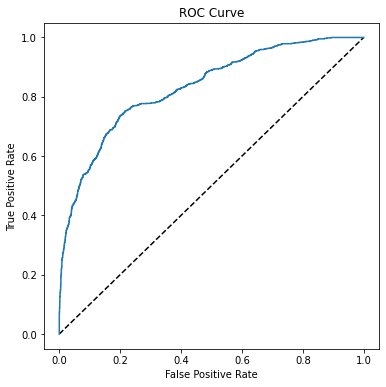

In [65]:
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction.
***
### 4i. AUC (Area Under Curve)
The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model.

In [66]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8318523794556218


AUC at 0.8319 is moderately good.
***
# 5. Pipeline creation

We now create a pipeline that does some more preprocessing of the data to make it better for the algorithm to fit a model to it. We'll use 2 here:

- Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.
- Encoding categorical variables. By using a *one hot encoding* technique we can create individual binary (true/false) features for each possible category value.

We then select an algorithm to train a model on the training data.

In [67]:
df.head()

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,TIG1GE,0,1,1,0,50,0,141,0.7,266000.0,185,105,12.3,180,93,0
1,VXUCV9,1,1,0,0,75,0,134,2.5,224000.0,99,162,13.0,140,47,1
2,AFH4F1,1,0,0,1,80,0,135,1.3,192000.0,776,179,12.4,150,61,2
3,ZK6PAC,0,1,0,0,60,0,136,0.9,228000.0,2261,136,15.3,130,48,3
4,6CVBRT,0,0,0,0,70,0,141,0.9,358000.0,1202,171,13.3,177,64,4


In [68]:
# 0 - Gender
# 1 - Smoke
# 2 - Diabetes
# 3 - Age
# 4 - Ejection Fraction
# 5 - Sodium
# 6 - Creatinine
# 7 - Platelets
# 8 - Creatine phosphokinase
# 9 - Blood Pressure
# 10 - Hemoglobin
# 11 - Height
# 12 - Weight
# 13 - Favorite color

# Numeric features -
# Age, Sodium, Creatinine, Platelets, Creatine phosphokinase, Blood Pressure, Hemoglobin, Height, Weight
# [3,5,6,7,8,9,10,11,12]

# Categorical features -
# Gender, Smoke, Diabetes, Ejection Fraction, Favorite color
# [0,1,2,4,13]

***
### 5a. Create a model

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric columns (make them on the same scale)
numeric_features = [3,5,6,7,8,9,10,11,12]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,4,13]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/LogReg_RegularizationRate, solver="liblinear"))])

# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [3, 5, 6, 7, 8, 9, 10, 11,
                                                   12]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 4, 13])])),
                ('logregressor',
                 LogisticRegression(C=10.0, solver='liblinear'))])


In [70]:
# Purpose of this cell is to generate the print output of the selected features for the 1st subplot in the charts further below

# Dictionary for returning the string of the features
features_dict = {
    0: 'Gender',
    1: 'Smoke',
    2: 'Diabetes',
    3: 'Age',
    4: 'Ejection Fraction',
    5: 'Sodium',
    6: 'Creatinine',
    7: 'Platelets',
    8: 'Creatine phosphokinase',
    9: 'Blood Pressure',
    10: 'Hemoglobin',
    11: 'Height',
    12: 'Weight',
    13: 'Favorite color'
}

# Initialise empty string list for feature names
features_list = []

# Combine int list of categorical and numeric features
# categorical_features = [0, 1, 2, 4, 13]
# numeric_features = [3, 5, 6, 7, 8, 9, 10, 11, 12]
# combined_features = [0, 1, 2, 4, 13, 3, 5, 6, 7, 8, 9, 10, 11, 12]
combined_features = categorical_features + numeric_features

# Generate string list from the int list referencing the dictionary
for item in combined_features:
    features_list.append(features_dict[item])

# Generate a continuous string with each string feature on a new line
features_down = '\n'.join(features_list)
print(features_down)
# print('\n'.join(feature_list))

Gender
Smoke
Diabetes
Ejection Fraction
Favorite color
Age
Sodium
Creatinine
Platelets
Creatine phosphokinase
Blood Pressure
Hemoglobin
Height
Weight


***
### 5b. Get prediction and plot performance

Text(0.45, 0.38, '0.8731')

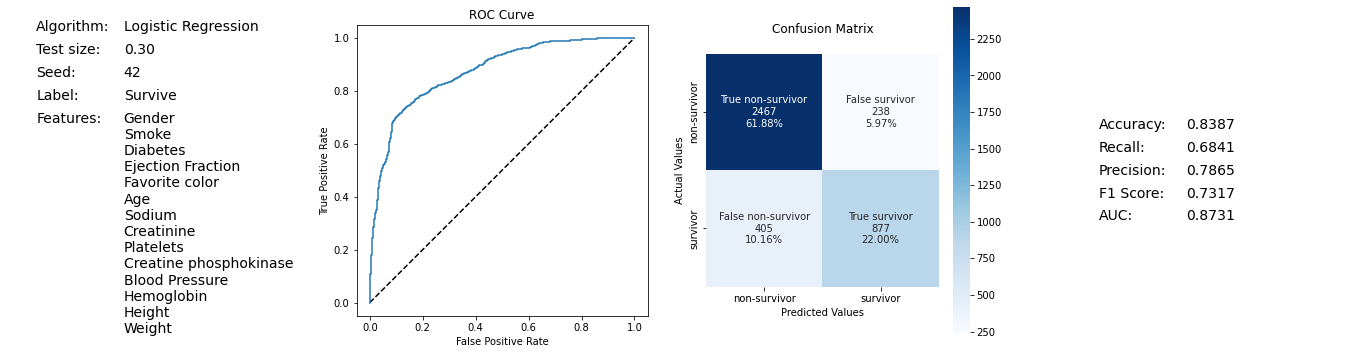

In [71]:
import numpy as np

# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Format plots arrangement
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))

# Print label and features in 1st subplot
fontsize = 14
padding_left_Attrib = 0.1
padding_left_Value = 0.40
padding_top = 0.96
padding_top_increment = 0.07
ax[0].axis("off")
ax[0].text(padding_left_Attrib, padding_top, 'Algorithm:', size=fontsize, va="top", ha="left")
ax[0].text(padding_left_Value, padding_top, 'Logistic Regression', size=fontsize, va="top", ha="left")
ax[0].text(padding_left_Attrib, padding_top-padding_top_increment, 'Test size:', size=fontsize, va="top", ha="left")
ax[0].text(padding_left_Value, padding_top-padding_top_increment, '{:.2f}'.format(split_testsize), size=fontsize, va="top", ha="left")
ax[0].text(padding_left_Attrib, padding_top-2*padding_top_increment, 'Seed:', size=fontsize, va="top", ha="left")
ax[0].text(padding_left_Value, padding_top-2*padding_top_increment, str(split_seed), size=fontsize, va="top", ha="left")
ax[0].text(padding_left_Attrib, padding_top-3*padding_top_increment, 'Label:', size=fontsize, va='top', ha='left')
ax[0].text(padding_left_Value, padding_top-3*padding_top_increment, 'Survive', size=fontsize, va='top', ha='left')
ax[0].text(padding_left_Attrib, padding_top-4*padding_top_increment, 'Features:', size=fontsize, va='top', ha='left')
ax[0].text(padding_left_Value, padding_top-4*padding_top_increment, features_down, size=fontsize, va='top', ha='left')

# Plot ROC curve in 2nd subplot
ax[1].set_aspect('equal', adjustable='box')
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].plot(fpr, tpr)
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')

# Plot Confusion Matrix in 3rd subplot
import seaborn as sns
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True non-survivor','False survivor','False non-survivor','True survivor']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
hmap = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax[2], square=True)
hmap.set_title('Confusion Matrix\n')
hmap.set_xlabel('Predicted Values')
hmap.set_ylabel('Actual Values')
hmap.xaxis.set_ticklabels(['non-survivor','survivor'])
hmap.yaxis.set_ticklabels(['non-survivor','survivor'])

# Plot metrics in 4th subplot
f_accuracy_logres = accuracy_score(y_test, predictions)
f_recall_logres = recall_score(y_test, predictions)
f_precision_logres = precision_score(y_test, predictions)
f_f1score = f1_score(y_test, predictions)
f_auc = roc_auc_score(y_test, y_scores[:,1])
s_auc = '{:.4f}'.format(f_auc) # save the string to be used as part of the JPG name
fontsize = 14
padding_left_Attrib = 0.15
padding_left_Value = 0.45
padding_top = 0.66
padding_top_increment = 0.07
ax[3].axis("off")
ax[3].text(padding_left_Attrib, padding_top, 'Accuracy:', size=fontsize, va="top", ha="left")
ax[3].text(padding_left_Value, padding_top, '{:.4f}'.format(f_accuracy_logres), size=fontsize, va="top", ha="left")
ax[3].text(padding_left_Attrib, padding_top-padding_top_increment, 'Recall:', size=fontsize, va="top", ha="left")
ax[3].text(padding_left_Value, padding_top-padding_top_increment, '{:.4f}'.format(f_recall_logres), size=fontsize, va="top", ha="left")
ax[3].text(padding_left_Attrib, padding_top-2*padding_top_increment, 'Precision:', size=fontsize, va="top", ha="left")
ax[3].text(padding_left_Value, padding_top-2*padding_top_increment, '{:.4f}'.format(f_precision_logres), size=fontsize, va="top", ha="left")
ax[3].text(padding_left_Attrib, padding_top-3*padding_top_increment, 'F1 Score:', size=fontsize, va="top", ha="left")
ax[3].text(padding_left_Value, padding_top-3*padding_top_increment, '{:.4f}'.format(f_f1score), size=fontsize, va="top", ha="left")
ax[3].text(padding_left_Attrib, padding_top-4*padding_top_increment, 'AUC:', size=fontsize, va='top', ha='left')
ax[3].text(padding_left_Value, padding_top-4*padding_top_increment, s_auc, size=fontsize, va='top', ha='left')

# Save plot as JPG file in output folder
# from datetime import datetime
# import os
# dt_string = datetime.now().strftime("%Y-%m-%d %H%M%S") # for prefixing datetime to file name
# filename = dt_string+' '+'Logistic Regresion'+', AUC - '+s_auc+'.jpg' # AUC metric tag serves as a quick comparison between runs while seeing in the folder
# parentdirectory = os.path.abspath(os.getcwd()) # gets directory this script is run in
# outputdirectory = os.path.join(parentdirectory, 'output') # place JPGs in output folder one directory above where script is
# fig.savefig(os.path.join(outputdirectory, filename), bbox_inches='tight', dpi=300)

The pre-processing (scaling and one hot encoding) has improved the model's prediction.

Accuracy: 0.7906 -> 0.8387

Recall: 0.5530 -> 0.6841

Precision 0.7302 -> 0.7865

F1 Score: 0.6294 -> 0.7317

AUC: 0.8319 -> 0.8731
***
# 6. Pipeline creation with refactored code
We can test individual features to see how they singly contribute to the predictions, and also see the performance of other classification algorithms.

We will use re-factored code from the 'src' subdirectory:

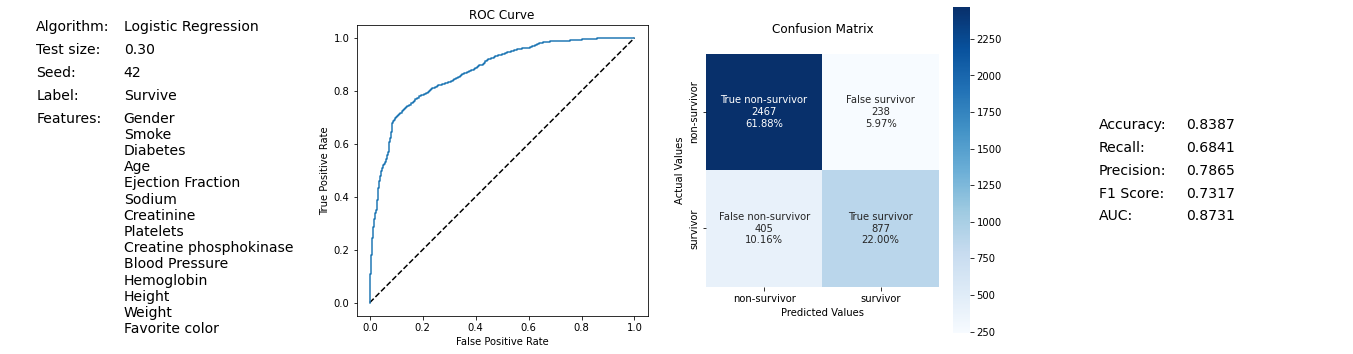

In [72]:
from src.pipeline_classifier import *

i_algo = 1
# Enter integer 1 to 4 to select the ML algorithm to train and test the model on.
# 1 - Logistic Regression
# 2 - Random Forest Classifier
# 3 - Support Vector Machine
# 4 - K-Nearest Neighbour

f_testsize = 0.3
# Enter a float to set the train-test size
# e.g. 0.3 -> 30% of data is reserved for testing

i_seed = 42
# Enter the seed for the random state shuffling during train-test data split (useful for reproducibility).
# Set to <None> to allow randomisation across different runs.

ls_features = ['Gender', 'Smoke', 'Diabetes', 'Age', 'Ejection Fraction', 'Sodium', 'Creatinine', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight', 'Favorite color']
# Enter the features you want as a list.
# ['Gender', 'Smoke', 'Diabetes', 'Age', 'Ejection Fraction', 'Sodium', 'Creatinine', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight', 'Favorite color']

fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

***
### 6a. Experimentation and analysis of features on predictive ability
Let's examine the impact of individual features on the predictions.

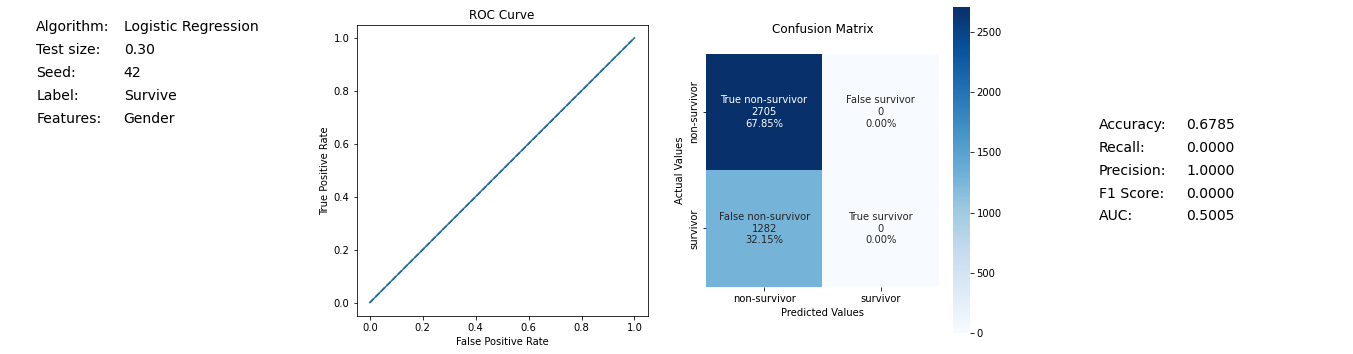

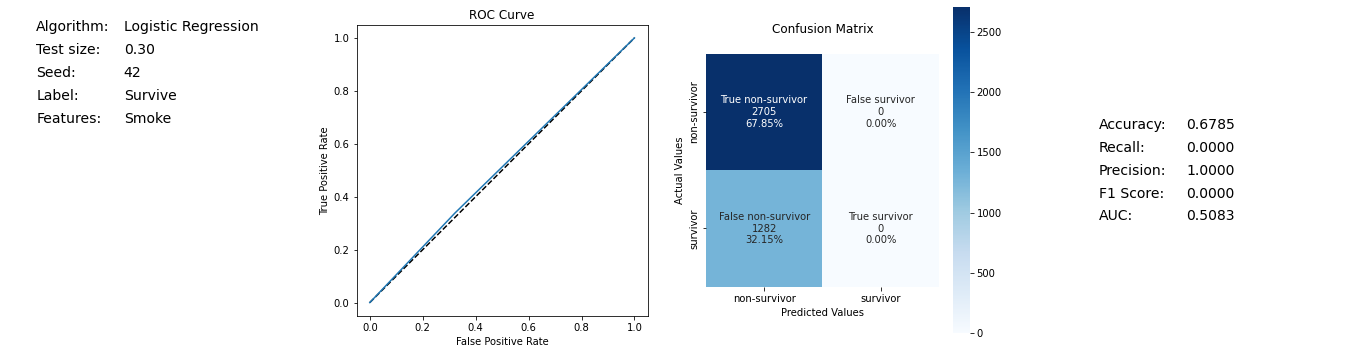

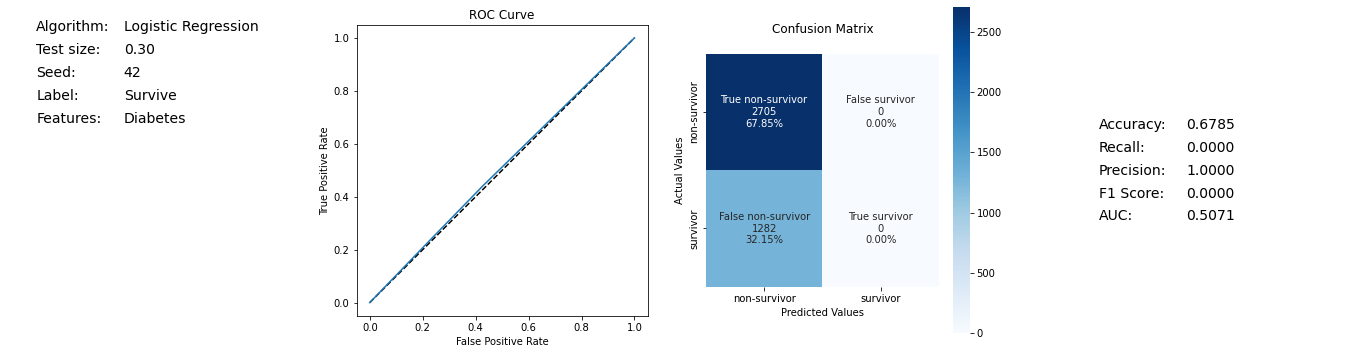

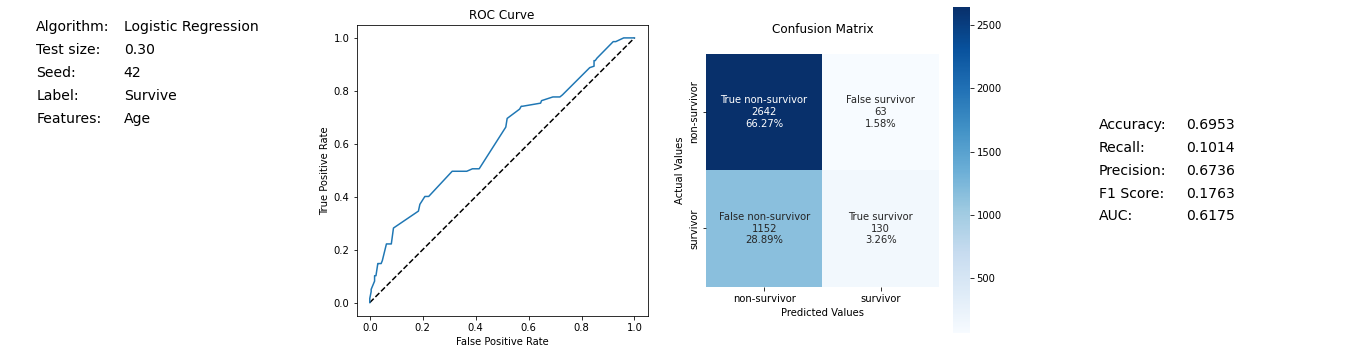

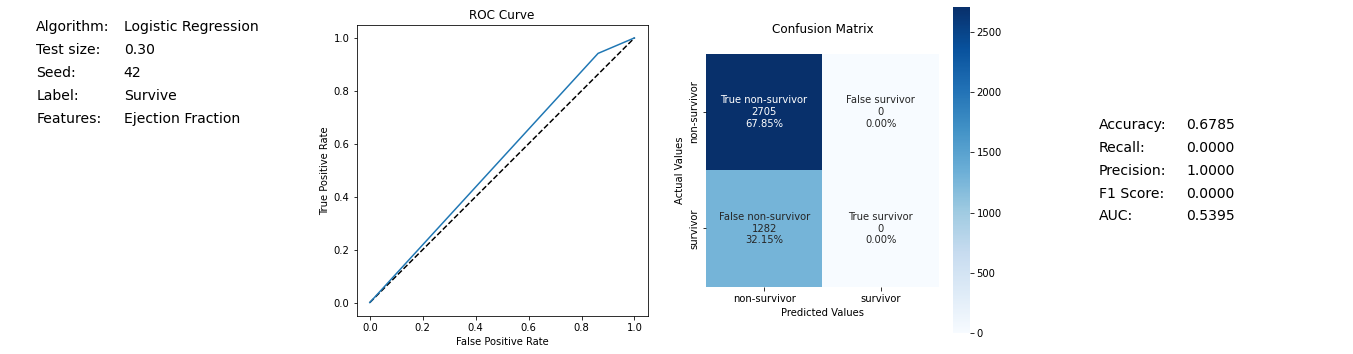

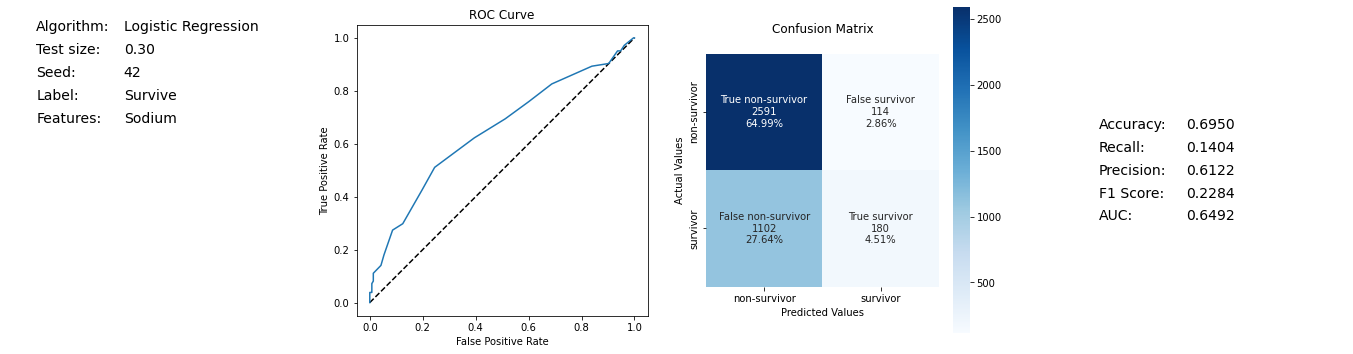

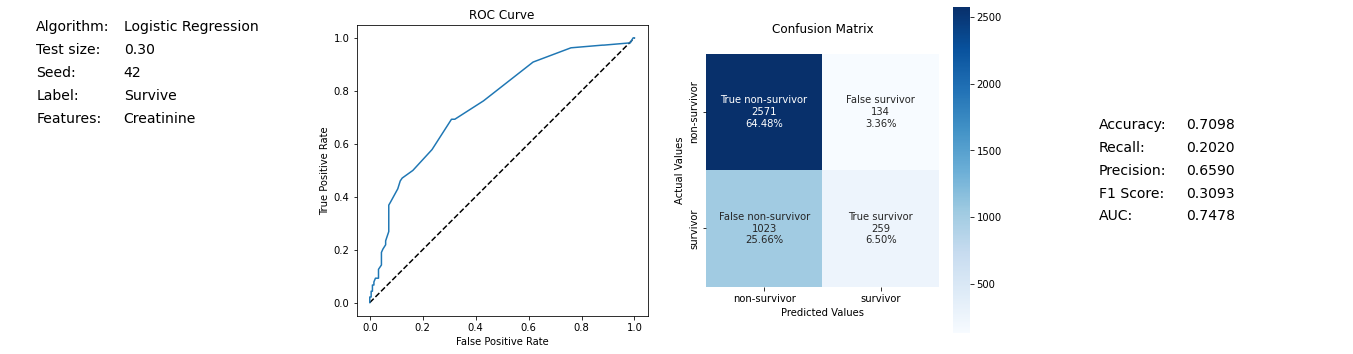

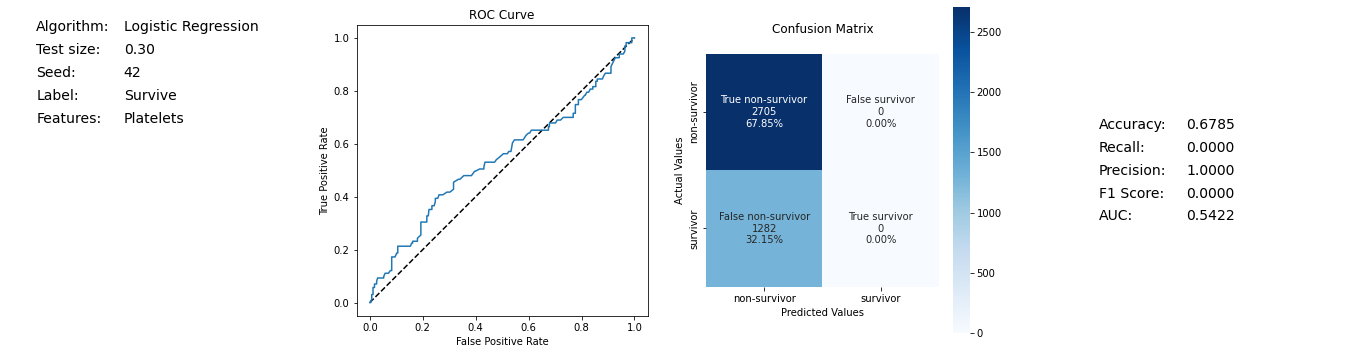

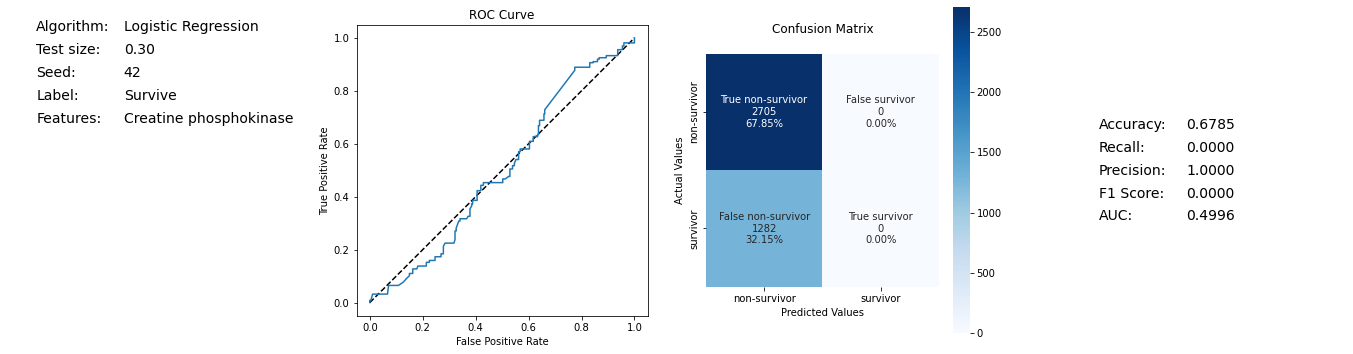

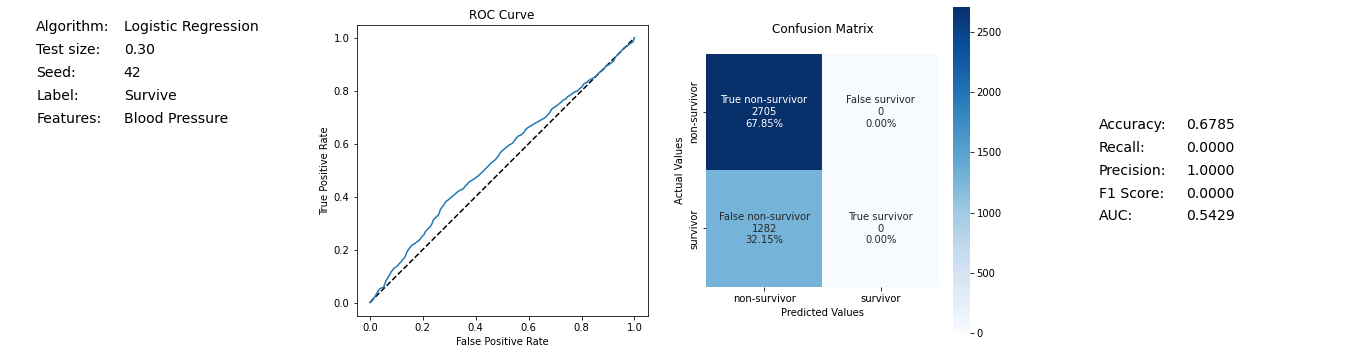

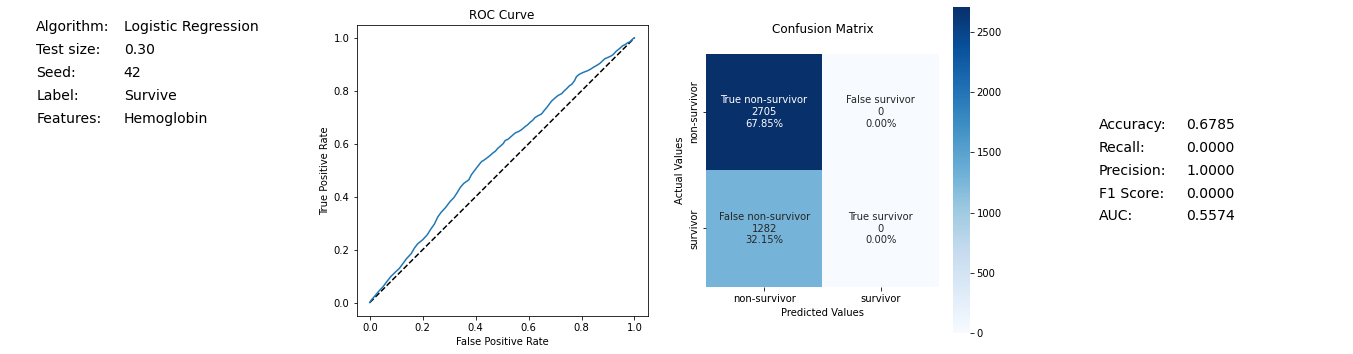

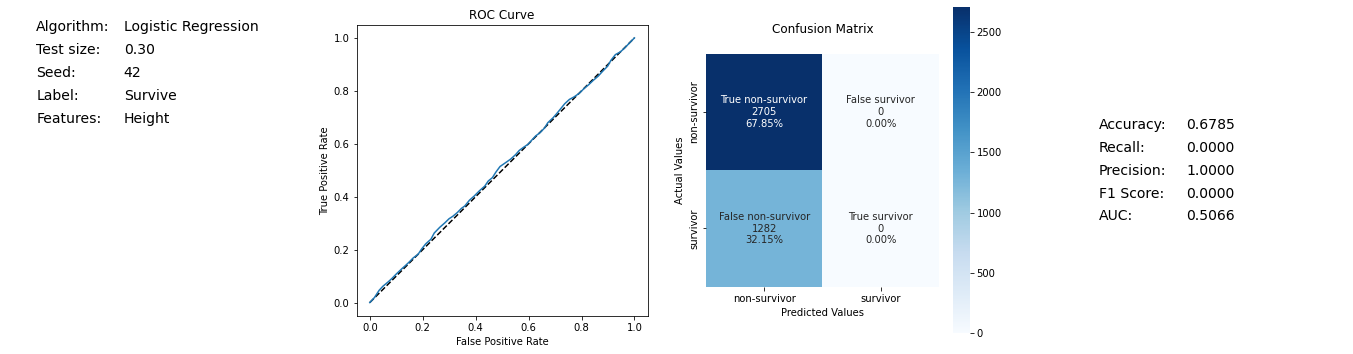

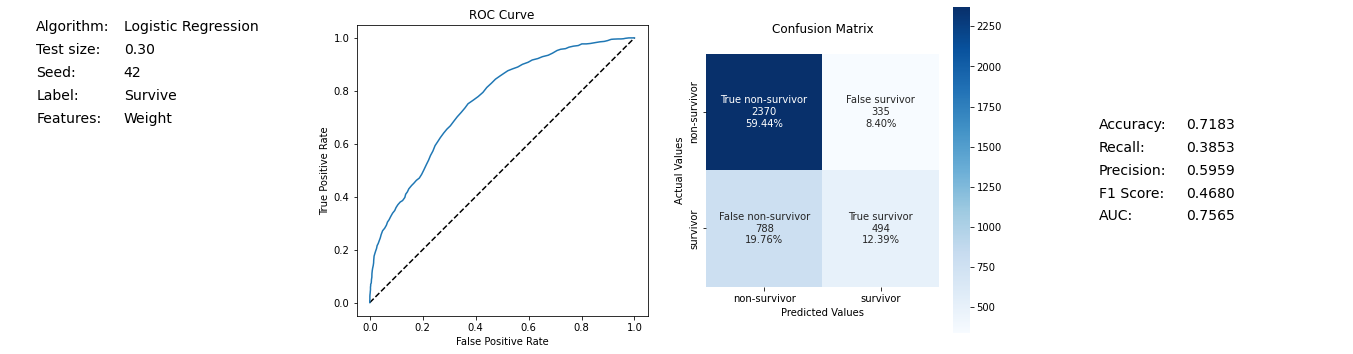

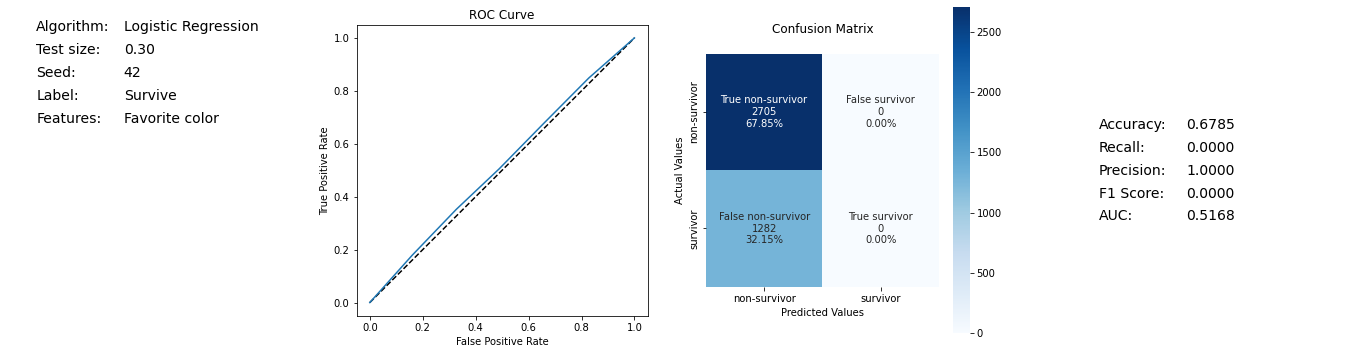

In [73]:
i_algo = 1
f_testsize = 0.3
i_seed = 42

features = ['Gender', 'Smoke', 'Diabetes', 'Age', 'Ejection Fraction', 'Sodium', 'Creatinine', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight', 'Favorite color']
for x in features:
    ls_features = [x]
    fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# ls_features = ['Gender']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Smoke']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Diabetes']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Age']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Ejection Fraction']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Sodium']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Creatinine']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Platelets']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Creatine phosphokinase']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Blood Pressure']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Hemoglobin']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Height']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Weight']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)
# ls_features = ['Favorite color']
# fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed)

Observation on the predictive ability of the Logistic Regression classification model just run:

Gender, Smoke, Diabetes, Creatine phosphokinase, Height and Favorite Color contribute the least to the model's predictive ability.

Ejection Fraction, Platelets, Blood Pressure, and Hemoglobin contribute a little.

While Age, Sodium, Creatinine, and Weight have the largest effect on predictive ability.

We also evidently see that a high Precision does not mean much if the model predicts everyone as survivors.

Intuitively, we would expect Favorite Color to have zero impact but its AUC is higher than even Gender, Smoke, Diabetes, Creatine Phosphokinase and Height.

We could change the test size higher and also change the random_state seed.

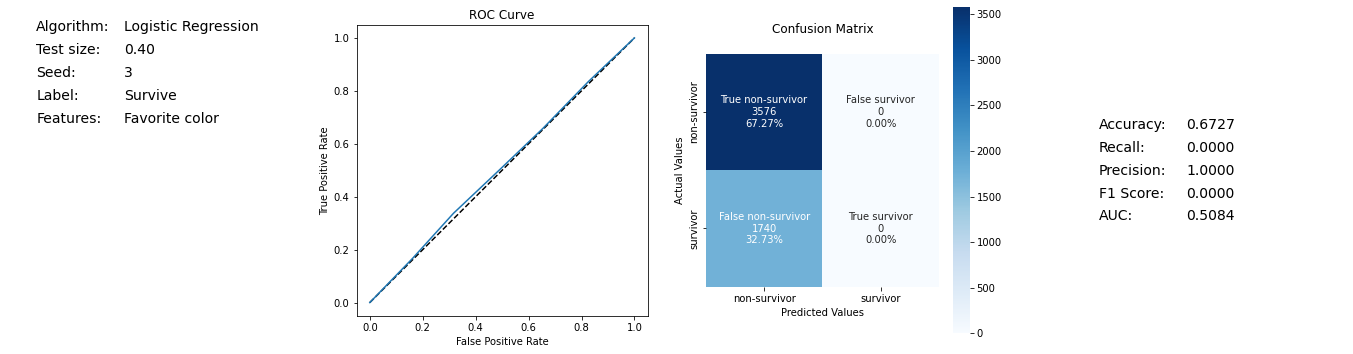

In [74]:
i_algo = 1
f_testsize = 0.4
i_seed = 3
ls_features = ['Favorite color']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

The AUC is lower in this run. We can pretty much say it suggests no discrimimation.
***
We can try a combination of features next.

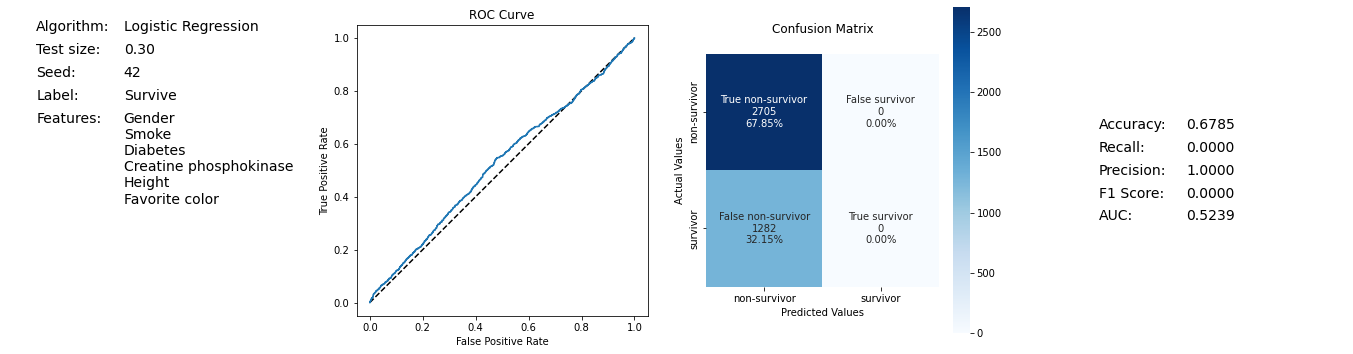

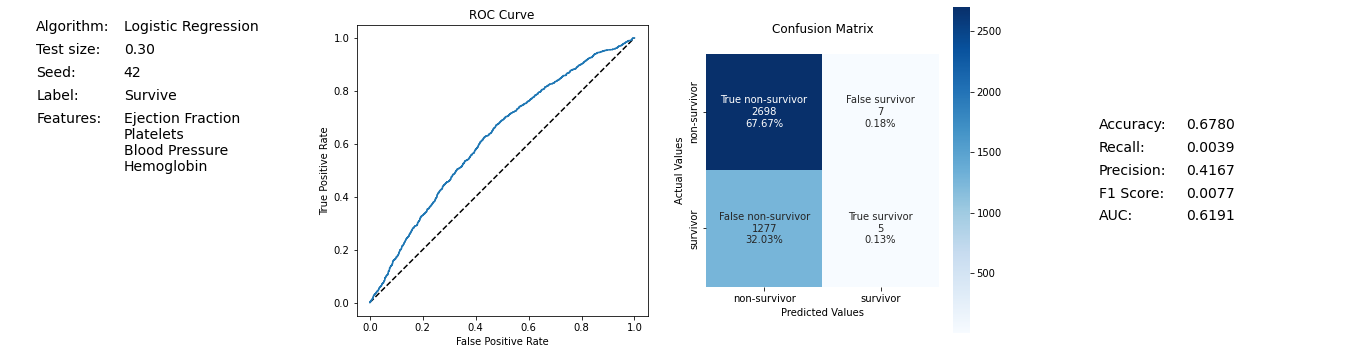

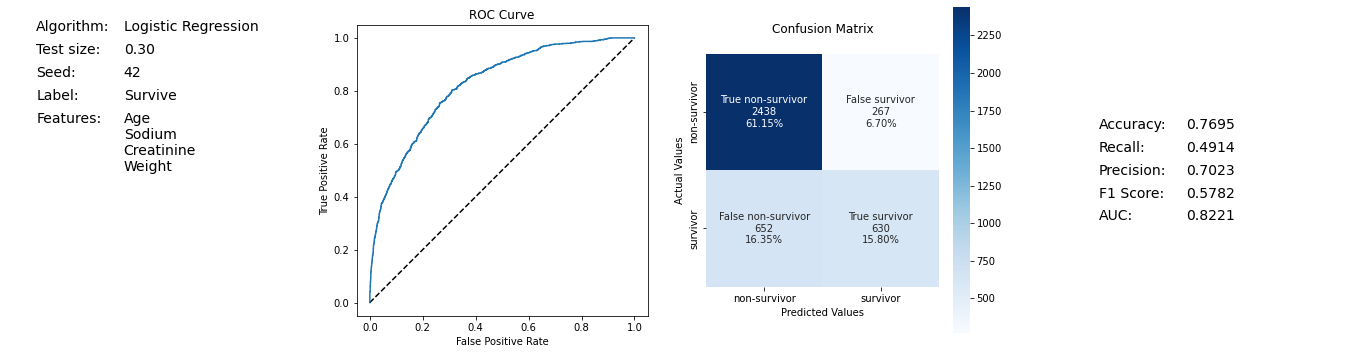

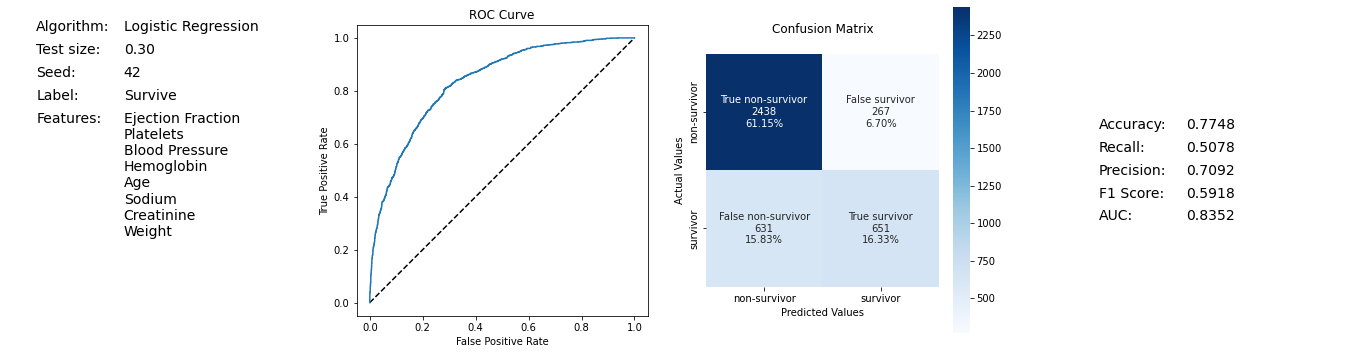

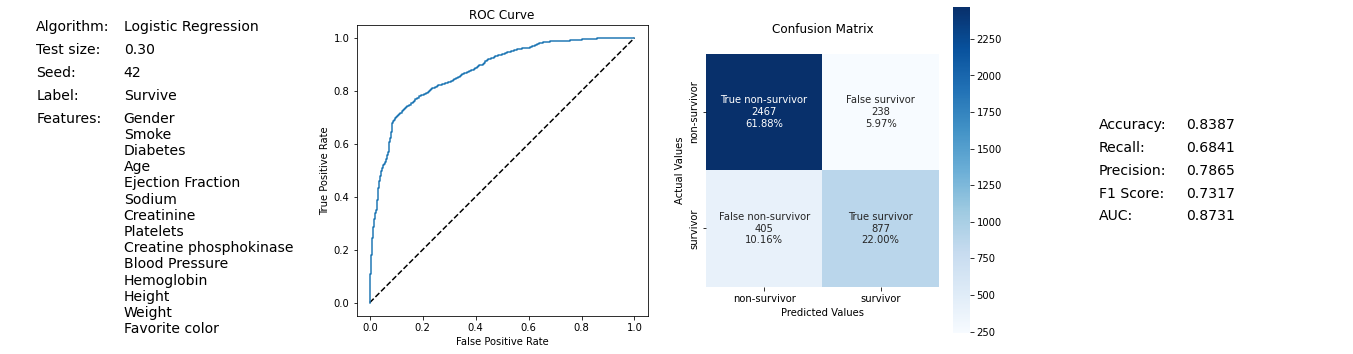

In [75]:
i_algo = 1
f_testsize = 0.3
i_seed = 42

# identified least impactful features
ls_features = ['Gender', 'Smoke', 'Diabetes', 'Creatine phosphokinase', 'Height', 'Favorite color']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# identified moderately impactful features
ls_features = ['Ejection Fraction', 'Platelets', 'Blood Pressure', 'Hemoglobin']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# identified most impactful features
ls_features = ['Age', 'Sodium', 'Creatinine', 'Weight']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# identified moderate and most impactful features
ls_features = ['Ejection Fraction', 'Platelets', 'Blood Pressure', 'Hemoglobin', 'Age', 'Sodium', 'Creatinine', 'Weight']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# all features
ls_features = ['Gender', 'Smoke', 'Diabetes', 'Age', 'Ejection Fraction', 'Sodium', 'Creatinine', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight', 'Favorite color']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

***
### 6a. Experimentation and analysis of different algorithms on predictive ability
We train and evaluate with Random Forest Classifier next.

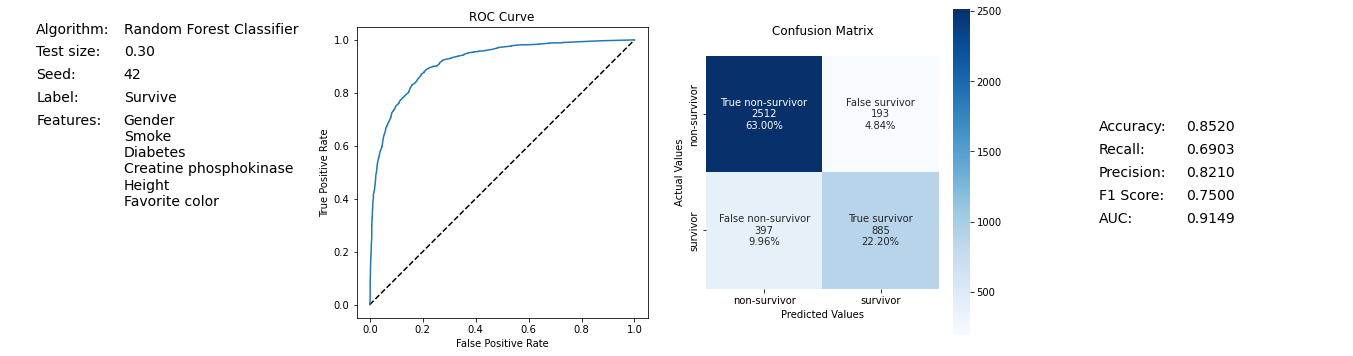

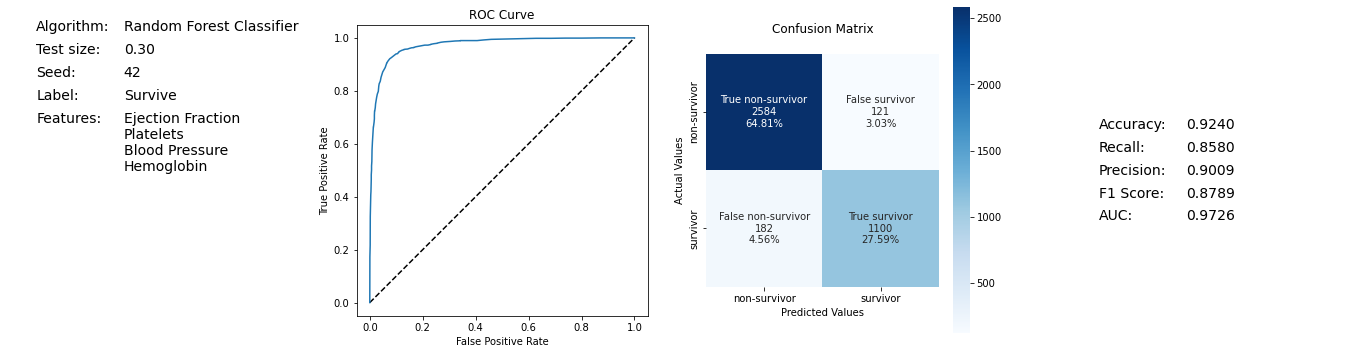

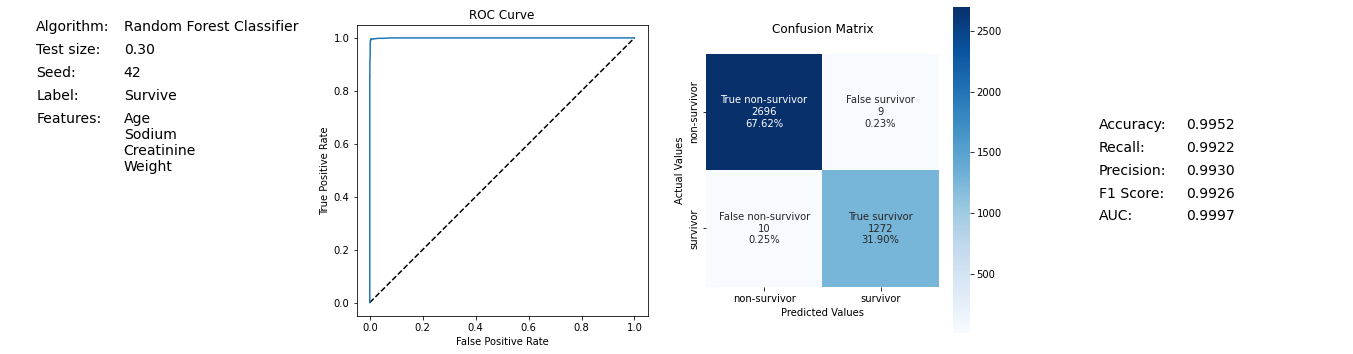

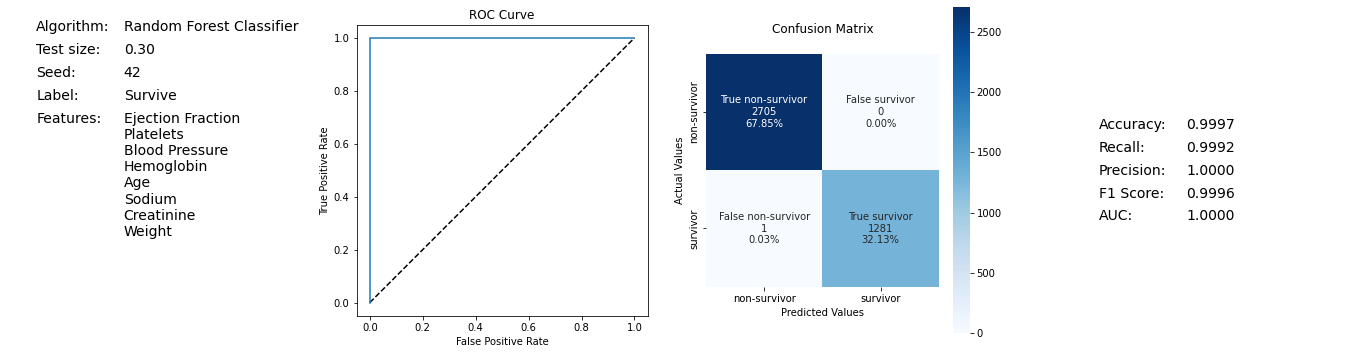

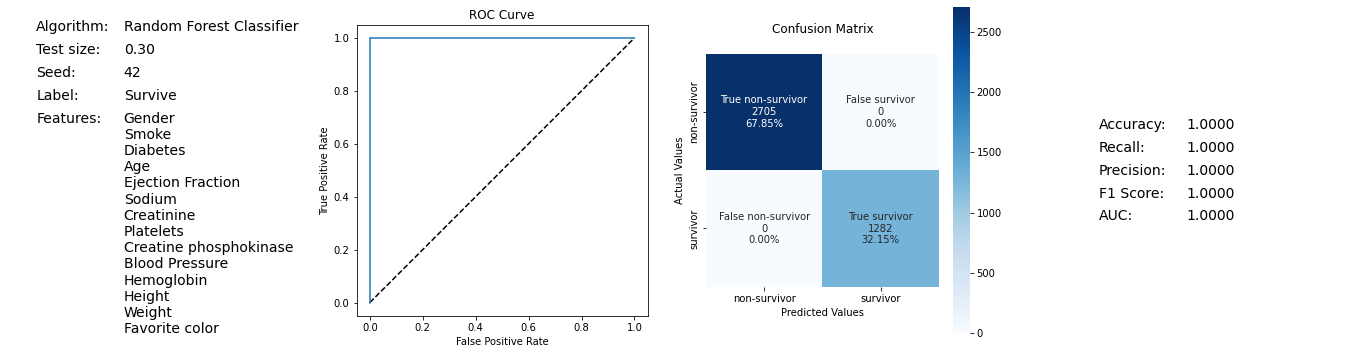

In [76]:
i_algo = 2
f_testsize = 0.3
i_seed = 42

# identified least impactful features
ls_features = ['Gender', 'Smoke', 'Diabetes', 'Creatine phosphokinase', 'Height', 'Favorite color']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# identified moderately impactful features
ls_features = ['Ejection Fraction', 'Platelets', 'Blood Pressure', 'Hemoglobin']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# identified most impactful features
ls_features = ['Age', 'Sodium', 'Creatinine', 'Weight']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# identified moderate and most impactful features
ls_features = ['Ejection Fraction', 'Platelets', 'Blood Pressure', 'Hemoglobin', 'Age', 'Sodium', 'Creatinine', 'Weight']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# all features
ls_features = ['Gender', 'Smoke', 'Diabetes', 'Age', 'Ejection Fraction', 'Sodium', 'Creatinine', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight', 'Favorite color']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

The Random Forest Classifier model is excellent!
***
We train and evaluate with Support Vector Machine next. (this may take 6 to 7 minutes to run)

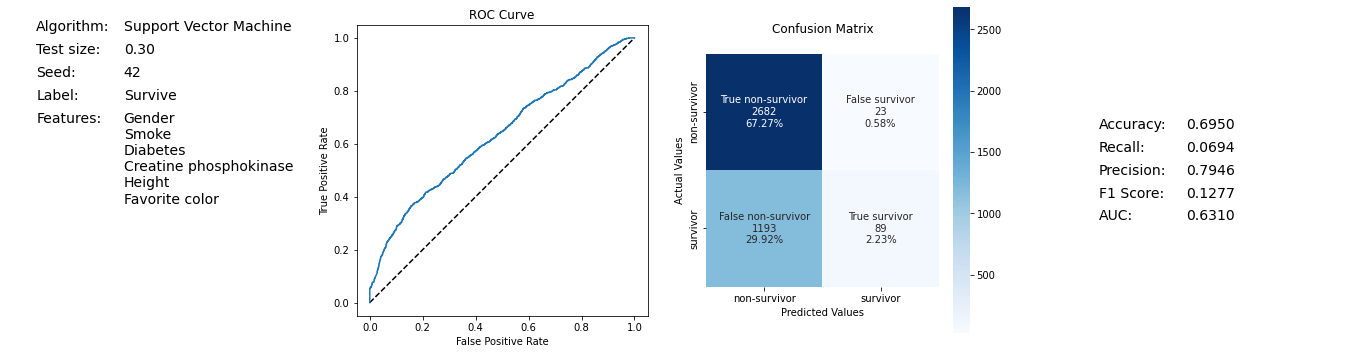

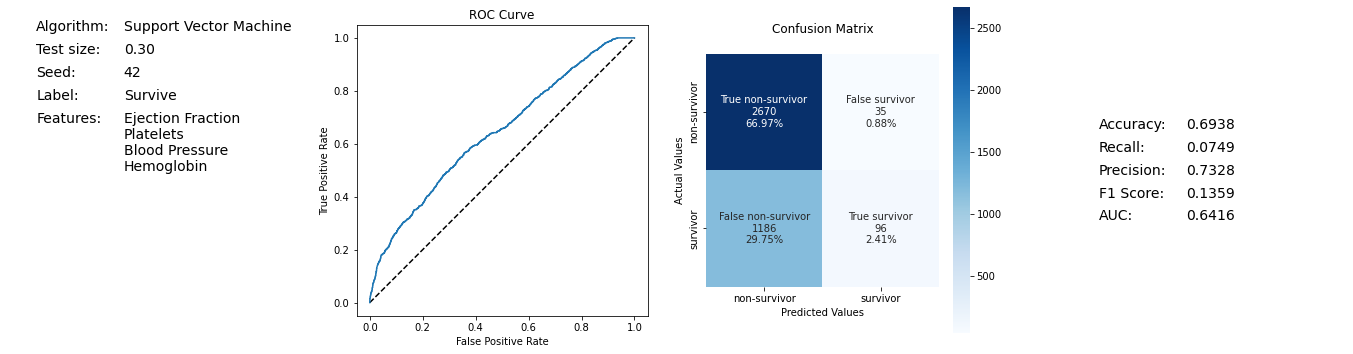

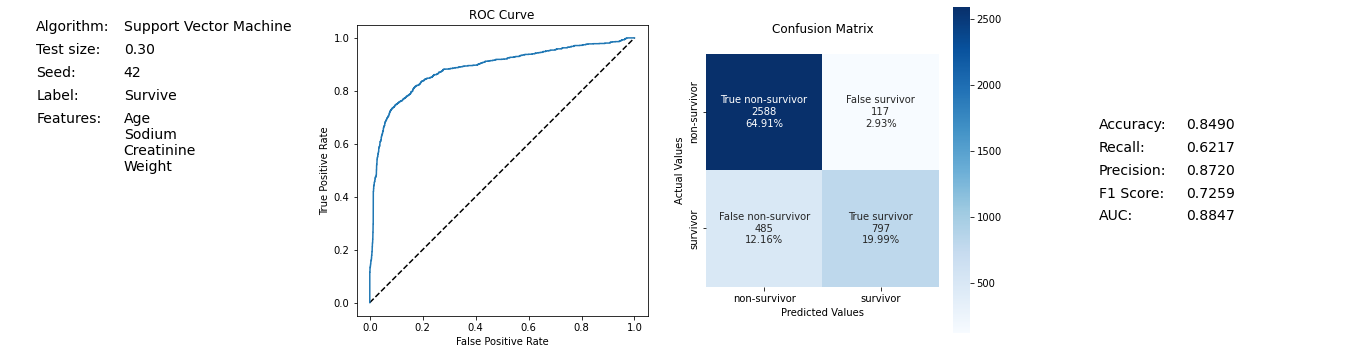

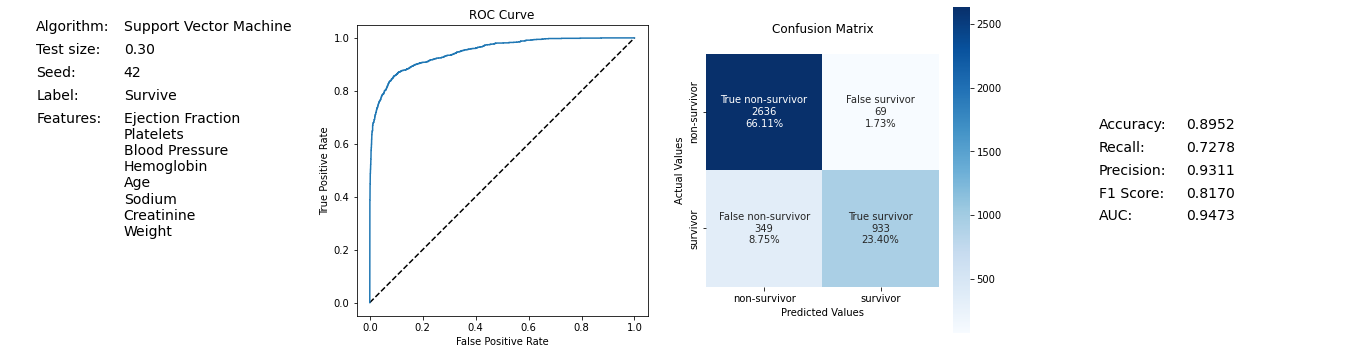

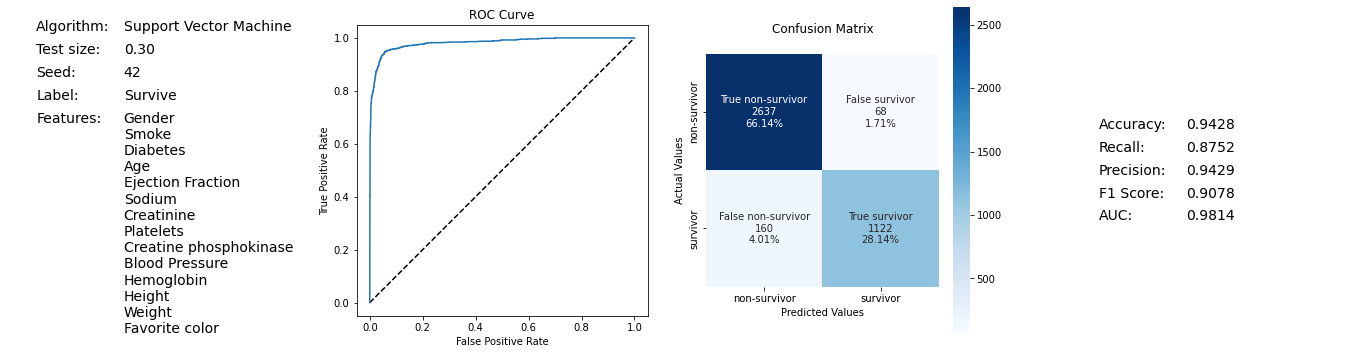

In [77]:
i_algo = 3
f_testsize = 0.3
i_seed = 42

# identified least impactful features
ls_features = ['Gender', 'Smoke', 'Diabetes', 'Creatine phosphokinase', 'Height', 'Favorite color']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# identified moderately impactful features
ls_features = ['Ejection Fraction', 'Platelets', 'Blood Pressure', 'Hemoglobin']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# identified most impactful features
ls_features = ['Age', 'Sodium', 'Creatinine', 'Weight']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# identified moderate and most impactful features
ls_features = ['Ejection Fraction', 'Platelets', 'Blood Pressure', 'Hemoglobin', 'Age', 'Sodium', 'Creatinine', 'Weight']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# all features
ls_features = ['Gender', 'Smoke', 'Diabetes', 'Age', 'Ejection Fraction', 'Sodium', 'Creatinine', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight', 'Favorite color']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

For the SVM model, the performance increases significantly with more features.
***
We train and evaluate with K-Nearest Neighbour next.

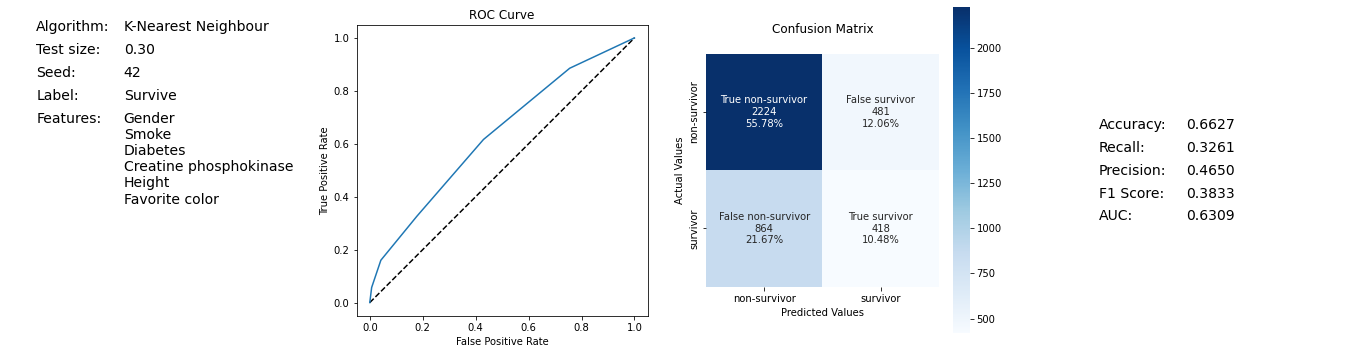

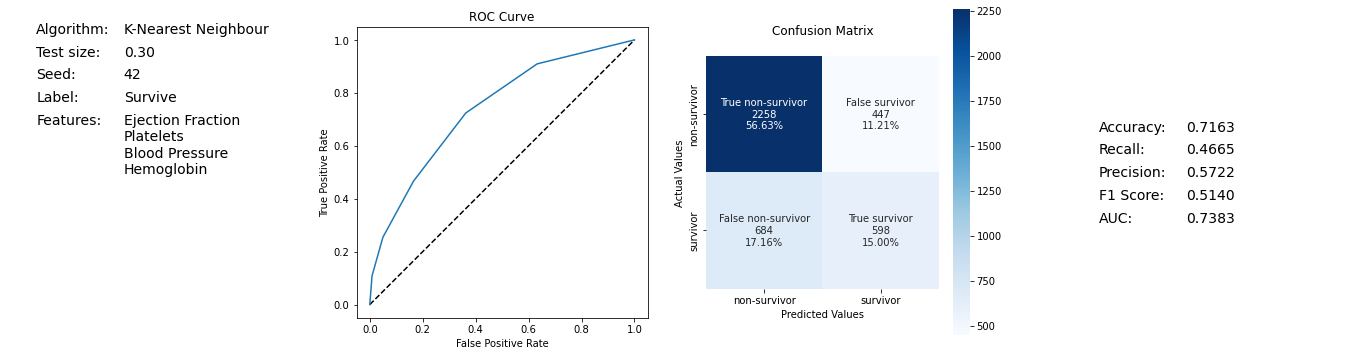

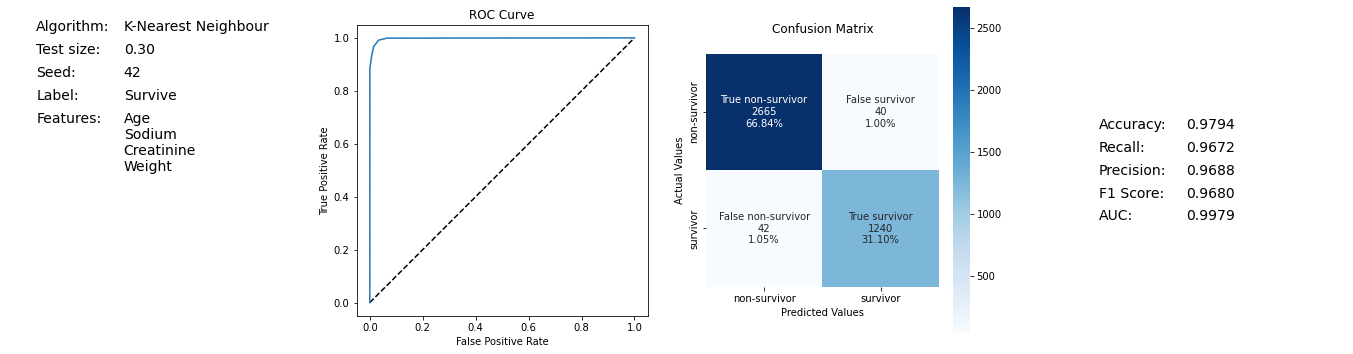

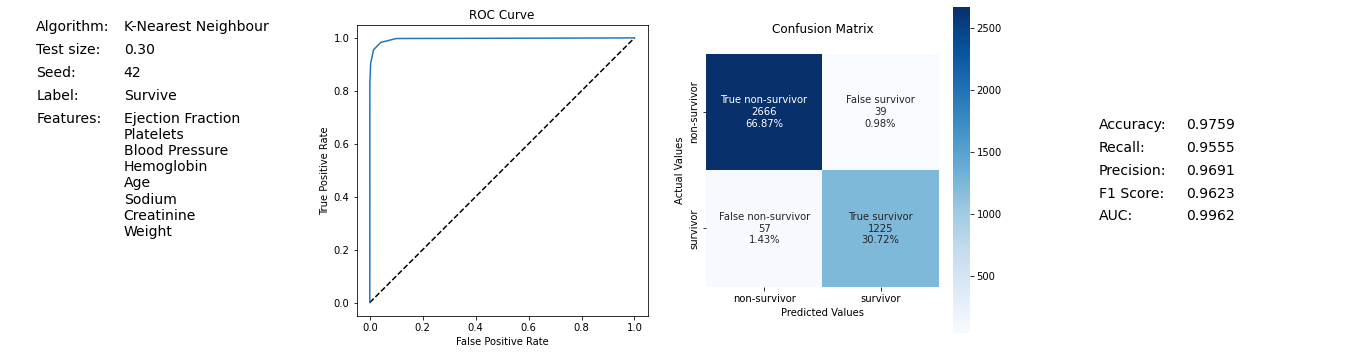

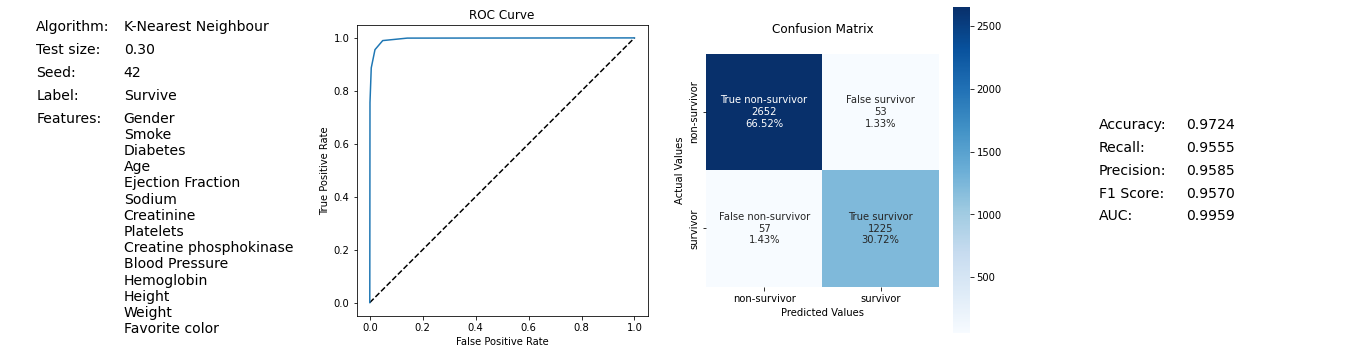

In [78]:
i_algo = 4
f_testsize = 0.3
i_seed = 42

# identified least impactful features
ls_features = ['Gender', 'Smoke', 'Diabetes', 'Creatine phosphokinase', 'Height', 'Favorite color']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# identified moderately impactful features
ls_features = ['Ejection Fraction', 'Platelets', 'Blood Pressure', 'Hemoglobin']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# identified most impactful features
ls_features = ['Age', 'Sodium', 'Creatinine', 'Weight']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# identified moderate and most impactful features
ls_features = ['Ejection Fraction', 'Platelets', 'Blood Pressure', 'Hemoglobin', 'Age', 'Sodium', 'Creatinine', 'Weight']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

# all features
ls_features = ['Gender', 'Smoke', 'Diabetes', 'Age', 'Ejection Fraction', 'Sodium', 'Creatinine', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight', 'Favorite color']
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], i_algo, f_testsize, i_seed, True, False)

Similarly the KNN model, the performance increases significantly with more features. The jump in predictive ability with just the earlier identified moderate features is more than with the SVM model.
***
Let's compare the performance contributed by the moderate features across the 4 algorithms.

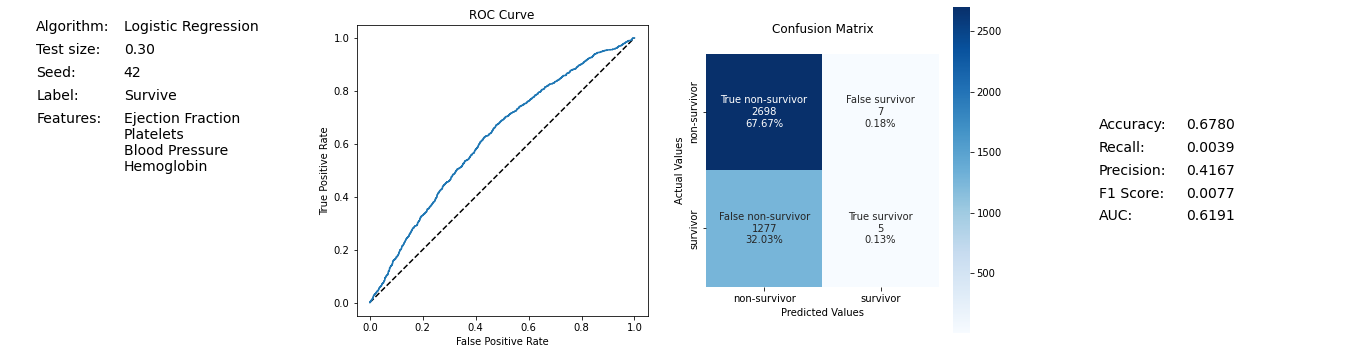

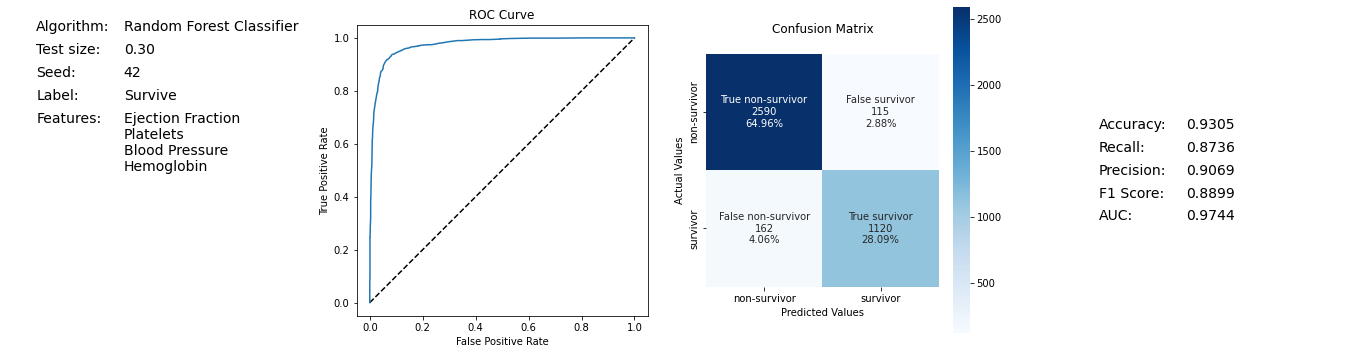

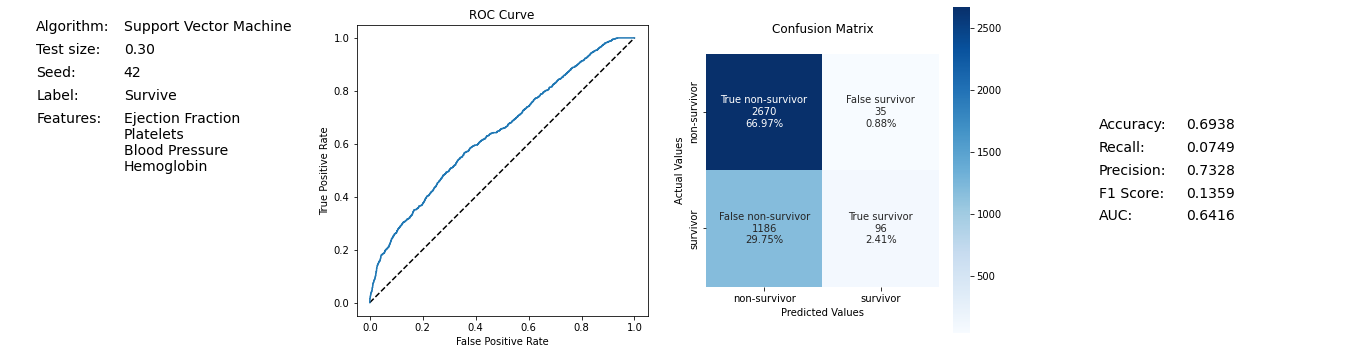

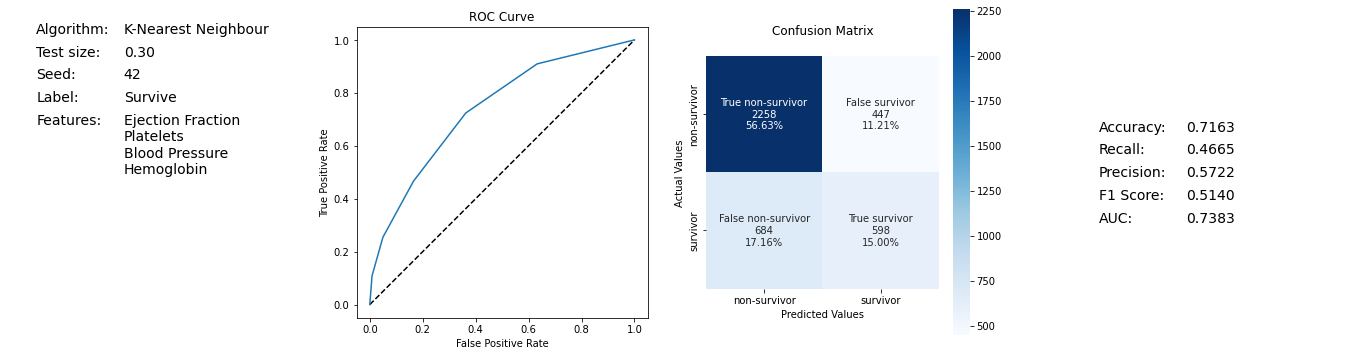

In [79]:
# identified moderately impactful features
f_testsize = 0.3
i_seed = 42
ls_features = ['Ejection Fraction', 'Platelets', 'Blood Pressure', 'Hemoglobin']

fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], 1, f_testsize, i_seed, True, False)
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], 2, f_testsize, i_seed, True, False)
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], 3, f_testsize, i_seed, True, False)
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], 4, f_testsize, i_seed, True, False)

Here we can clearly see that the model trained on the Random Forest Classifier algorithm performs the best.
***
For completeness, let's compare the performance contributed by the most impactful features across the 4 algorithms.

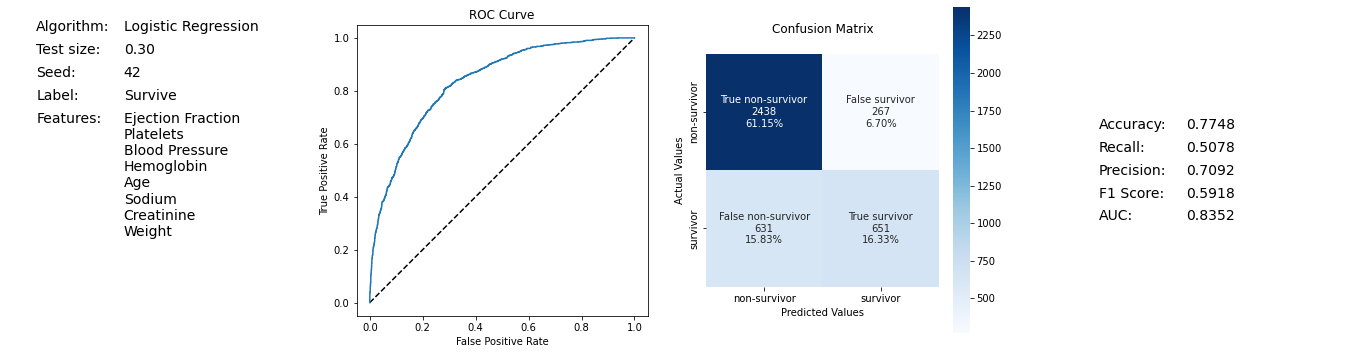

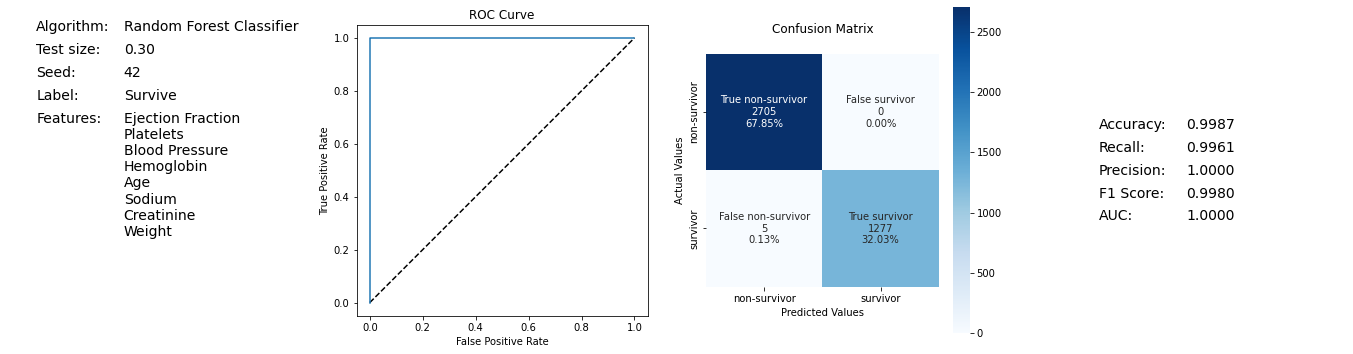

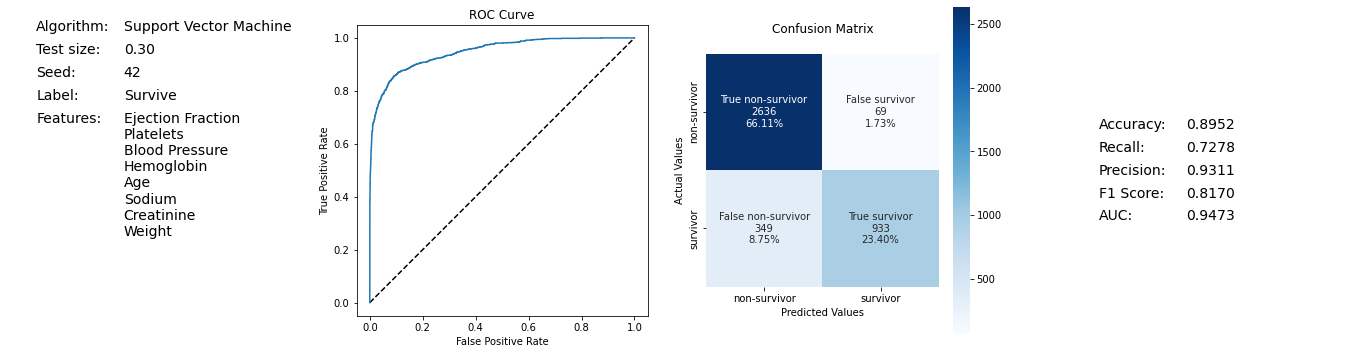

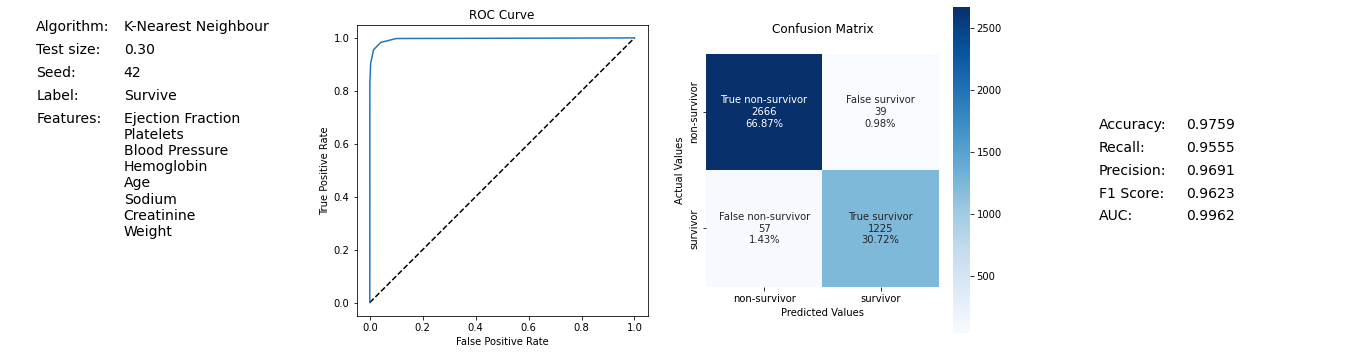

In [80]:
# identified most impactful features
f_testsize = 0.3
i_seed = 42
ls_features = ['Ejection Fraction', 'Platelets', 'Blood Pressure', 'Hemoglobin', 'Age', 'Sodium', 'Creatinine', 'Weight']

fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], 1, f_testsize, i_seed, True, False)
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], 2, f_testsize, i_seed, True, False)
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], 3, f_testsize, i_seed, True, False)
fig = pipeline_classifier(ls_features, df[ls_features], df['Survive'], 4, f_testsize, i_seed, True, False)

***
# 7. Conclusion

We see that the model trained on Random Forest Classifier being the best predictor followed by K-Nearest Neighbour.

I reckon by virtue of its ability to correct for overfitting helps it outperform the other 3 algorithms tested.

Further testing should be performed with unseen data to further increase confidence in the model.